In [1]:
import matplotlib
import matplotlib.pylab as plt
matplotlib.rcParams['figure.figsize'] = (20, 10)
font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)
    
from netCDF4 import Dataset
import h5py
import numpy as np
import glob
import pandas as pd
import xarray as xr

In [2]:
ps=np.array((10,20,30,50,70,100,150,200,250,300,400,500,700,850,925,1000))*100.
weights=pd.read_fwf('/users/staff/leo/fastscratch/MSUDaten/std_atmosphere_wt_function_chan_4.txt',skiprows=1,widths=(5,10,10,10,10,10,10,10,10,10,10),error_bad_lines=False)
# weights=pd.read_fwf('/users/staff/leo/fastscratch/MSUDaten/std_atmosphere_wt_function_chan_2_land.txt',skiprows=1,widths=(5,10,10,10,10,10,10,10,10,10,10),error_bad_lines=False)

x=weights.iloc[:-3].to_numpy()
x=np.asarray(x,dtype='float')
pweight=ps.copy()
for ip in range(pweight.shape[0]):
    l=0
    while ps[ip]<x[l][3]:
        l+=1
    #l
    #if ps[ip]<x[3][l] and ps[ip]>x[3][l+1]:
    pweight[ip]=(x[l][5]*(ps[ip]-x[l+1][3])+x[l+1][5]*(x[l][3]-ps[ip]))/(x[l][3]-x[l+1][3])

pweight /= np.sum(pweight[1:])
pweight

/users/staff/a1400070/.conda/envs/uv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  if (await self.run_code(code, result,  async_=asy)):


array([8.72159019e-03, 3.62715392e-02, 7.87242685e-02, 1.81369585e-01,
       2.55230544e-01, 2.64565753e-01, 1.33081392e-01, 3.95170118e-02,
       9.30506845e-03, 1.83863867e-03, 9.61994110e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [12]:
statid='017095'
fdir = './bt_nc_testing/'
ldir = '/users/staff/leo/fastscratch/rise/1.0/exp02/'

for chan in [2]:

    with Dataset(fdir+statid+'/feedbackglobbincorrmon_bt2_'+statid+'.nc') as f:
        x= np.nanmean(f.variables['montemp'][:1,chan,:],axis=0)
        #plt.plot(f.variables['datum'][0,:]/365.25+1900,f.variables['montemp'][0,2,:],label='RAOBCORE BT')

    with Dataset(fdir+statid+'/feedbackglobbincorrmon_rio24_bt2_'+statid+'.nc') as f:
        y= np.nanmean(f.variables['montemp'][:1,chan,:],axis=0)
        
    with Dataset(fdir+statid+'/feedbackglobbincorrmon_rit24_bt2_'+statid+'.nc') as f:
        z= np.nanmean(f.variables['montemp'][:1,chan,:],axis=0)

    with Dataset(fdir+statid+'/feedbackglobbinmon_bt2_'+statid+'.nc') as f:
        plt.plot(f.variables['datum'][0,:]/365.25+1900,(np.nanmean(f.variables['montemp'][:1,chan,:],axis=0)-x),label='ADJ BT RAOBCORE')
        plt.plot(f.variables['datum'][0,:]/365.25+1900,(np.nanmean(f.variables['montemp'][:1,chan,:],axis=0)-y),label='ADJ BT RIO')
        plt.plot(f.variables['datum'][0,:]/365.25+1900,(np.nanmean(f.variables['montemp'][:1,chan,:],axis=0)-z),label='ADJ BT RIT')

    with Dataset(ldir+statid+'/feedbackglobbincorrmon'+statid+'.nc') as f:
        plt.plot(f.variables['datum'][0,:]/365.25+1900,np.nanmean(f.variables['rasocorrmon'][:1,4,:],axis=0),label='ADJ 100 hPa', ls='--', color='black')
        x=f.variables['rasocorrmon'][:]
        bt=np.zeros_like(x,shape=(x.shape[0],x.shape[2]))
        for ip in range(1,10):
            bt+=pweight[ip]*x[:,ip,:]
        plt.plot(f.variables['datum'][0,:]/365.25+1900,np.nanmean(bt[:1,:],axis=0), color = 'grey',linewidth = 6, alpha = 0.5, label='ADJ WEIGHTED')
        plt.title(statid + ' incl. 30hPa Channel '+str(chan+2))

    plt.legend()
    plt.show()
    plt.close()


FileNotFoundError: [Errno 2] No such file or directory: b'./bt_nc_testing/017095/feedbackglobbincorrmon_bt2_017095.nc'

/tmp/ipykernel_746404/1962264018.py:12: RuntimeWarning: Mean of empty slice
  y= np.nanmean(f.variables['montemp'][:1,chan,:],axis=0)
/tmp/ipykernel_746404/1962264018.py:16: RuntimeWarning: Mean of empty slice
  z= np.nanmean(f.variables['montemp'][:1,chan,:],axis=0)
/tmp/ipykernel_746404/1962264018.py:26: RuntimeWarning: Mean of empty slice
  plt.plot(f.variables['datum'][0,:]/365.25+1900,np.nanmean(f.variables['rasocorrmon'][:1,4,:],axis=0),label='ADJ 100 hPa', ls='--', color='black')
/tmp/ipykernel_746404/1962264018.py:31: RuntimeWarning: Mean of empty slice
  plt.plot(f.variables['datum'][0,:]/365.25+1900,np.nanmean(bt[:1,:],axis=0), color = 'grey',linewidth = 6, alpha = 0.5, label='ADJ WEIGHTED')


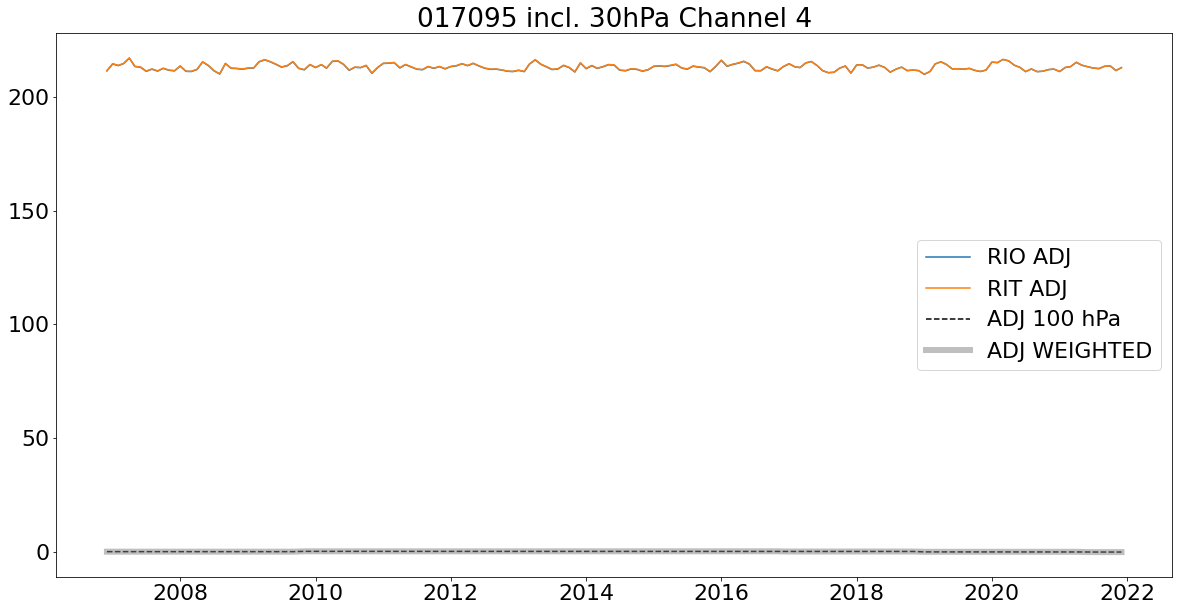

In [11]:
statid='017095'
fdir = './bt_nc_testing/'
ldir = '/users/staff/leo/fastscratch/rise/1.0/exp02/'

for chan in [2]:

#     with Dataset(fdir+statid+'/feedbackglobbincorrmon_bt2_'+statid+'.nc') as f:
#         x= np.nanmean(f.variables['montemp'][:1,chan,:],axis=0)
#         plt.plot(f.variables['datum'][0,:]/365.25+1900,f.variables['montemp'][0,2,:],label='RAOBCORE BT')

    with Dataset(fdir+statid+'/feedbackglobbincorrmon_rio24_bt2_'+statid+'.nc') as f:
        y= np.nanmean(f.variables['montemp'][:1,chan,:],axis=0)
        plt.plot(f.variables['datum'][0,:]/365.25+1900,f.variables['montemp'][0,2,:],label='RIO ADJ')

    with Dataset(fdir+statid+'/feedbackglobbincorrmon_rit24_bt2_'+statid+'.nc') as f:
        z= np.nanmean(f.variables['montemp'][:1,chan,:],axis=0)
        plt.plot(f.variables['datum'][0,:]/365.25+1900,f.variables['montemp'][0,2,:],label='RIT ADJ')


#     with Dataset(fdir+statid+'/feedbackglobbinmon_bt2_'+statid+'.nc') as f:
#         plt.plot(f.variables['datum'][0,:]/365.25+1900,(np.nanmean(f.variables['montemp'][:1,chan,:],axis=0)-x),label='ADJ BT RAOBCORE')
#         plt.plot(f.variables['datum'][0,:]/365.25+1900,(np.nanmean(f.variables['montemp'][:1,chan,:],axis=0)-y),label='ADJ BT RIO')
#         plt.plot(f.variables['datum'][0,:]/365.25+1900,(np.nanmean(f.variables['montemp'][:1,chan,:],axis=0)-z),label='ADJ BT RIT')

    with Dataset(ldir+statid+'/feedbackglobbincorrmon'+statid+'.nc') as f:
        plt.plot(f.variables['datum'][0,:]/365.25+1900,np.nanmean(f.variables['rasocorrmon'][:1,4,:],axis=0),label='ADJ 100 hPa', ls='--', color='black')
        x=f.variables['rasocorrmon'][:]
        bt=np.zeros_like(x,shape=(x.shape[0],x.shape[2]))
        for ip in range(1,10):
            bt+=pweight[ip]*x[:,ip,:]
        plt.plot(f.variables['datum'][0,:]/365.25+1900,np.nanmean(bt[:1,:],axis=0), color = 'grey',linewidth = 6, alpha = 0.5, label='ADJ WEIGHTED')
        plt.title(statid + ' incl. 30hPa Channel '+str(chan+2))

    plt.legend()
    plt.show()
    plt.close()


In [12]:
def calc_station(statid):
    statlist = statid
    statid = statlist.split('.nc')[0][-5:]
    print(statid)
    
    fbmean = glob.glob('/mnt/ssdraid/scratch/leo/rise/1.0/exp02/*'+str(statid)+'*/feedbackglobbincorrmon0*.nc')[0]
    dfm = xr.open_dataset(fbmean).to_dataframe()
    dfm.press = dfm.press * 100.
    dfm = dfm[dfm.press.isin([3000,5000,7000,10000,15000,20000,25000,30000,40000,50000,70000,85000])]
    dfm = dfm.loc[dfm.index.get_level_values('numdat') == 0]
    dfm = dfm.reset_index()    
    dfm = dfm.rename({'time':'time_idx'}, axis='columns')
    dfm = dfm.rename({'datum':'time', 'press':'plev'}, axis='columns')
    dfm.montemp = dfm.montemp + dfm.rasocorrmon
    
    df = xr.open_dataset(statlist).to_dataframe()
    df.press = df.press * 100.
    ###
    df = df[df.press.isin([3000,5000,7000,10000,15000,20000,25000,30000,40000,50000,70000,85000])]
#     df = df[df.datum > '1950']
    df = df.reset_index()
    df = df.rename({'time':'time_idx'}, axis='columns')
    df = df.rename({'datum':'time', 'press':'plev'}, axis='columns')
    all_dfta = df
    all_dfta = all_dfta.rename({'temperatures':'ta'}, axis='columns')

    for day in [True,False]:
        if day:
            dn_dfta = all_dfta.loc[all_dfta.hour == 12]
            m_dt = 1
        else:
            dn_dfta = all_dfta.loc[all_dfta.hour == 0]
            m_dt = 0
            
        for yr in range(1995,1997,1):
            for mon in range(int(str(yr)+'01'), int(str(yr)+'13'), 1):
                print(mon)
                
                dfta = dn_dfta.loc[(dn_dfta['time'].dt.year==int(str(mon)[:4])) 
                                   & (dn_dfta['time'].dt.month==int(str(mon)[-2:]))
                                  ]
                idfm =  dfm.loc[(dfm['time'].dt.year==int(str(mon)[:4])) 
                                & (dfm['time'].dt.month==int(str(mon)[-2:])) 
                                & (dfm['hour']==m_dt) 
                               ]
                df = dfta
                mon_mean = df.groupby(['plev']).aggregate({"ta":np.nanmean})
                plt.plot(idfm.montemp, idfm.plev, label='feedbackglobbincorrmon' ,linewidth = 4)
                plt.plot(mon_mean,idfm.plev,label='calc mean', linewidth = 4)
                
                ax = plt.gca()
                ax.set_ylim(ax.get_ylim()[::-1])
                
#                 print('calc_mean: ',mon_mean)
#                 print('file_mean: ', idfm)
                print('')
                plt.title(mon)
                plt.ylabel('pressure [Pa]')
                plt.ylabel('temperature [K]')
                plt.legend()
                plt.show()
                plt.close()

    
    return

11035
199501



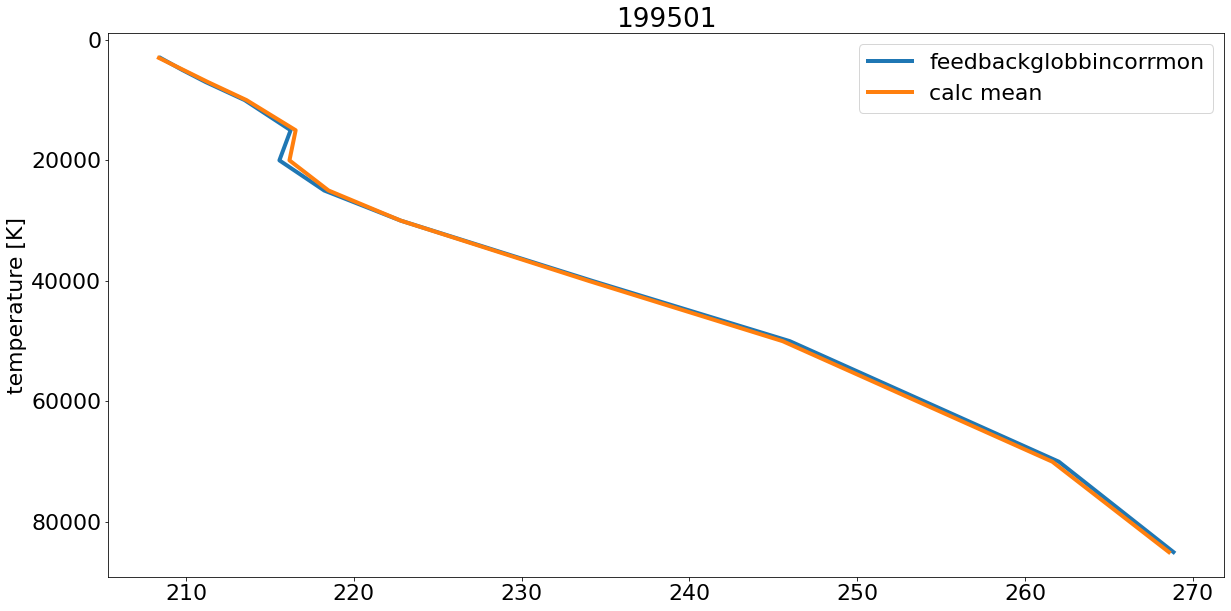

199502



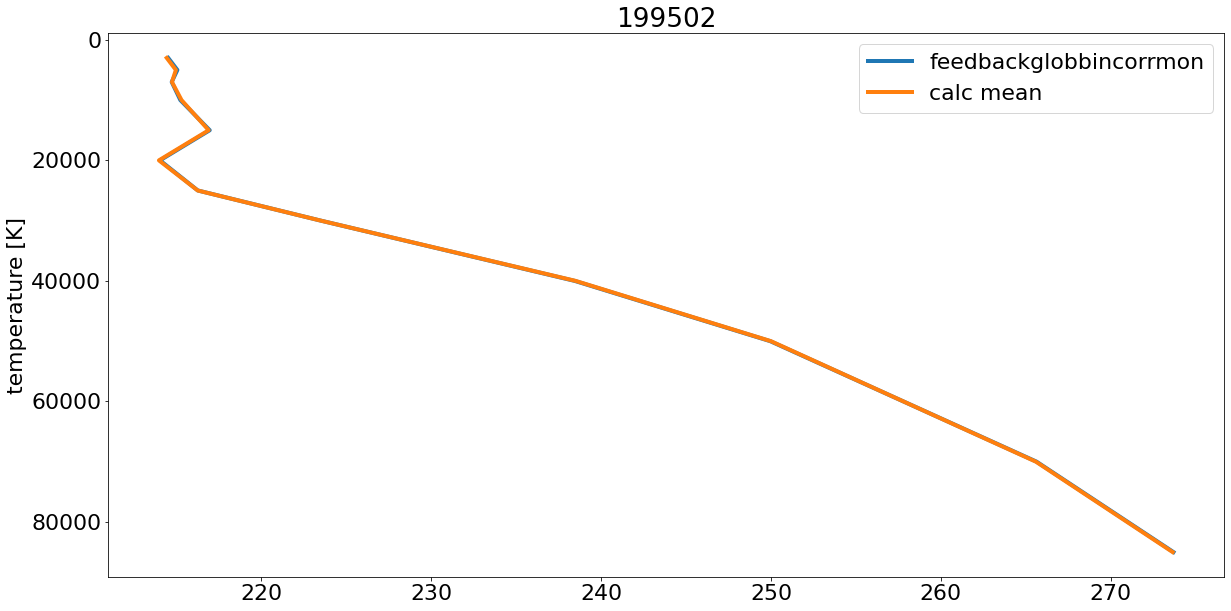

199503



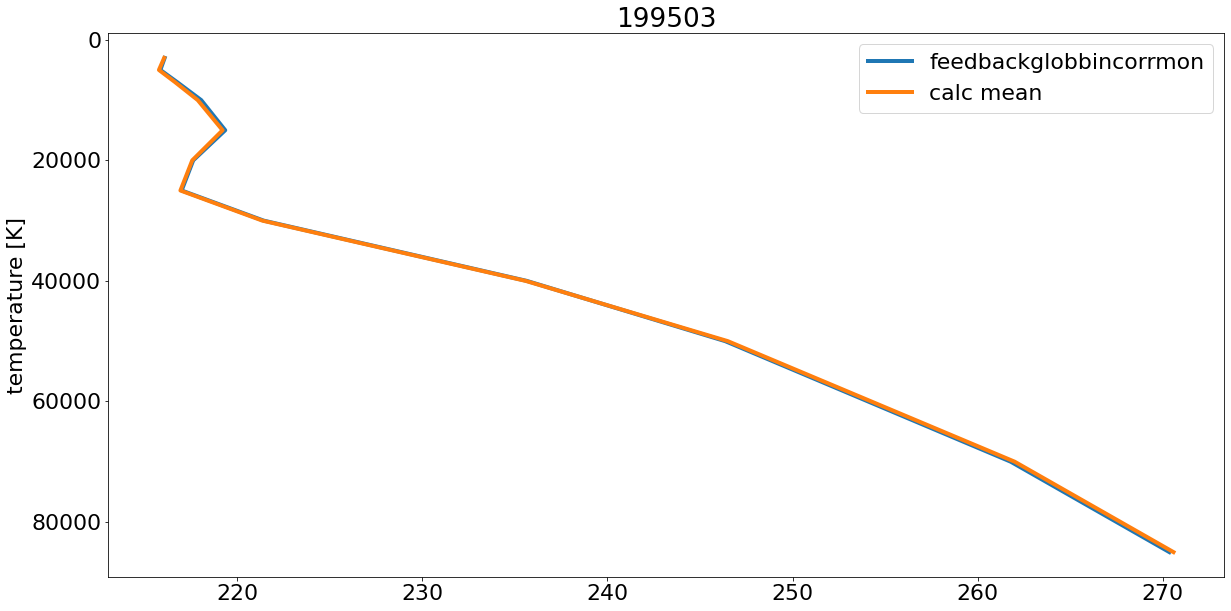

199504



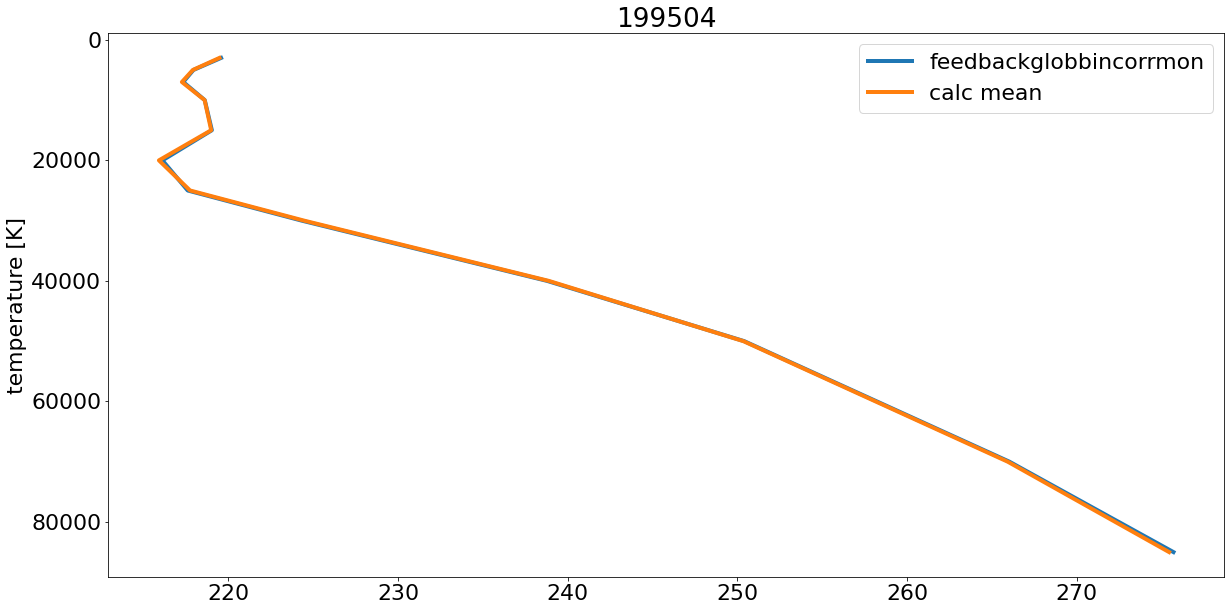

199505



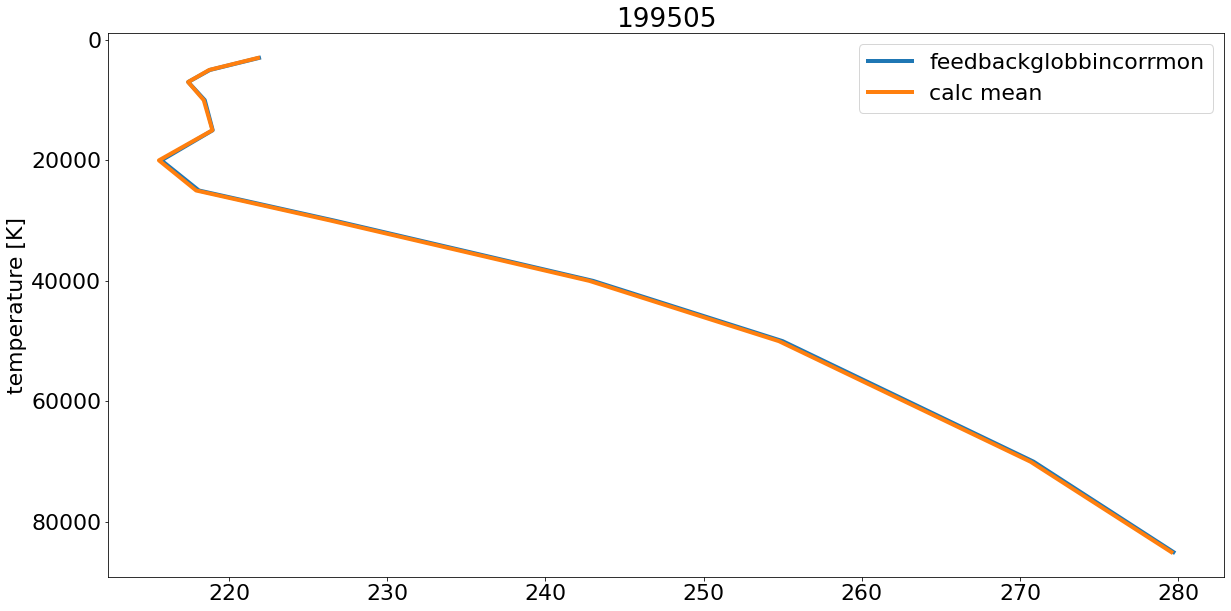

199506



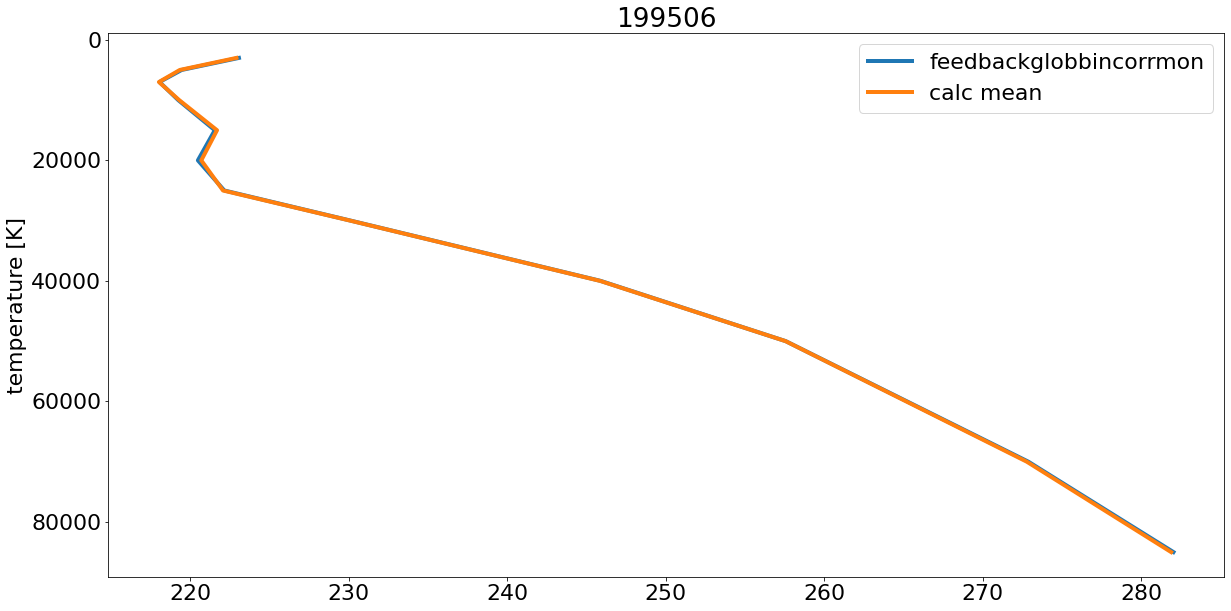

199507



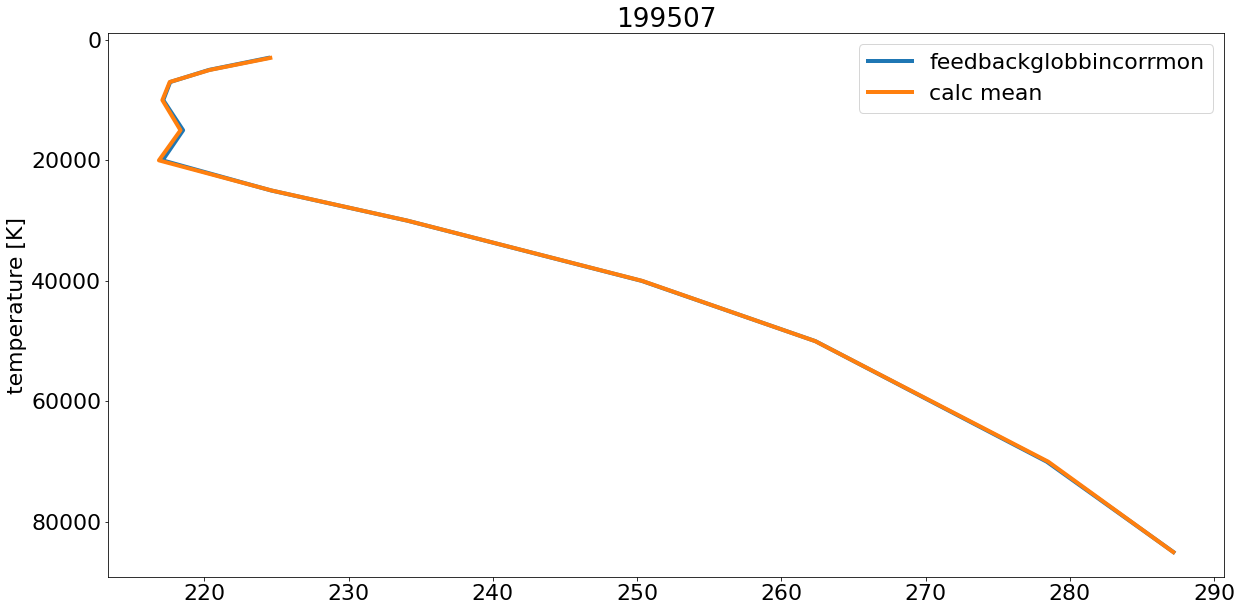

199508



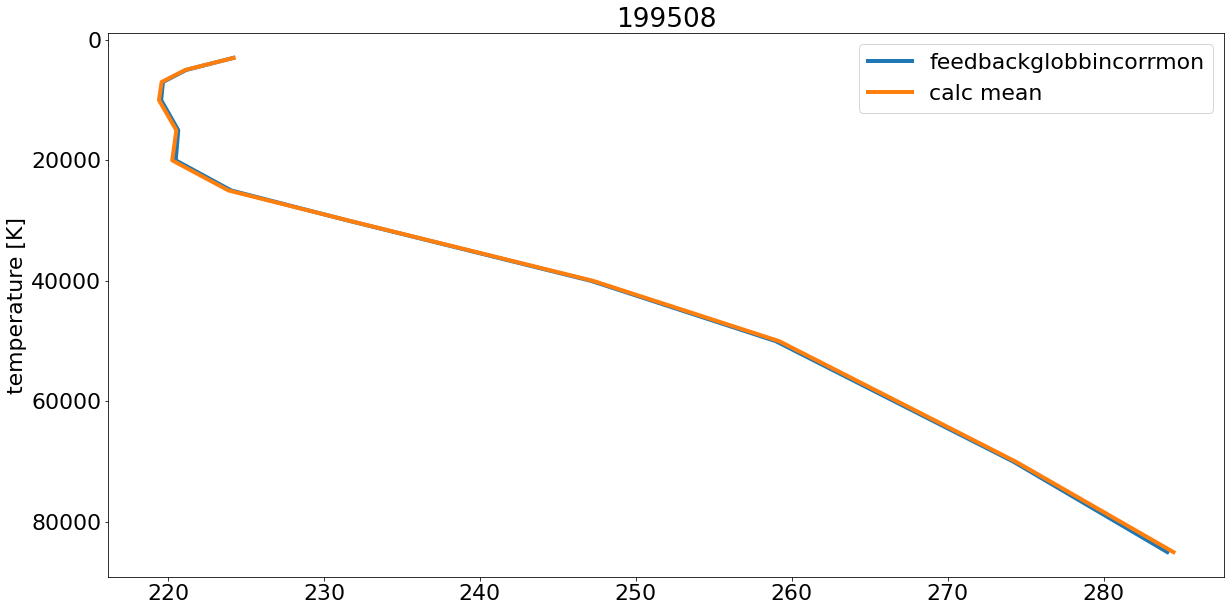

199509



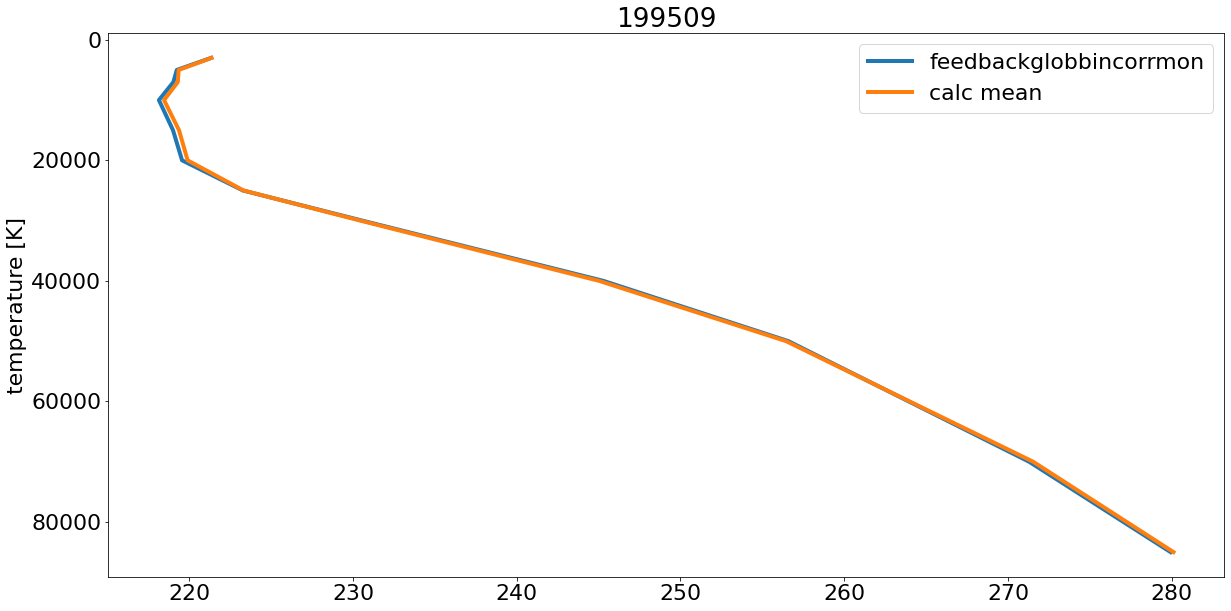

199510



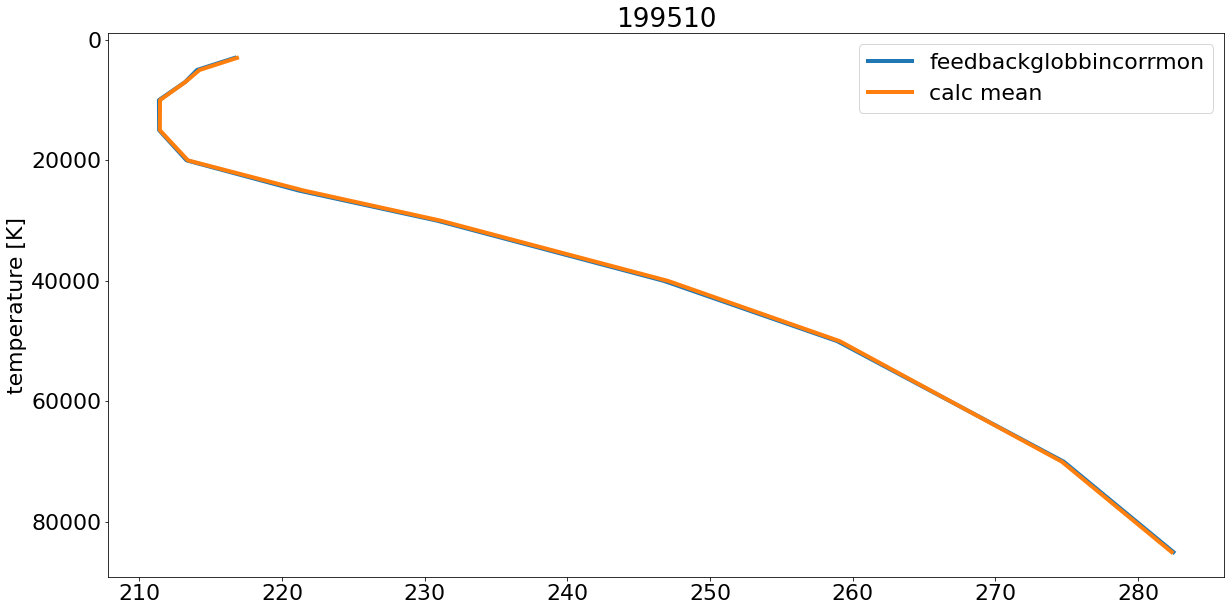

199511



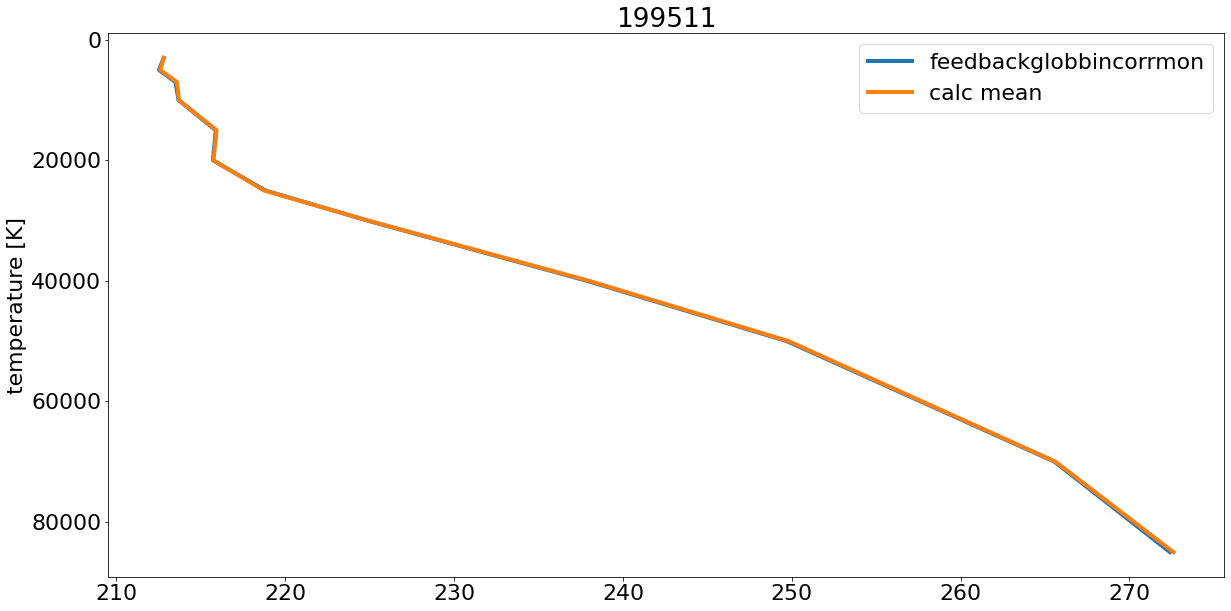

199512



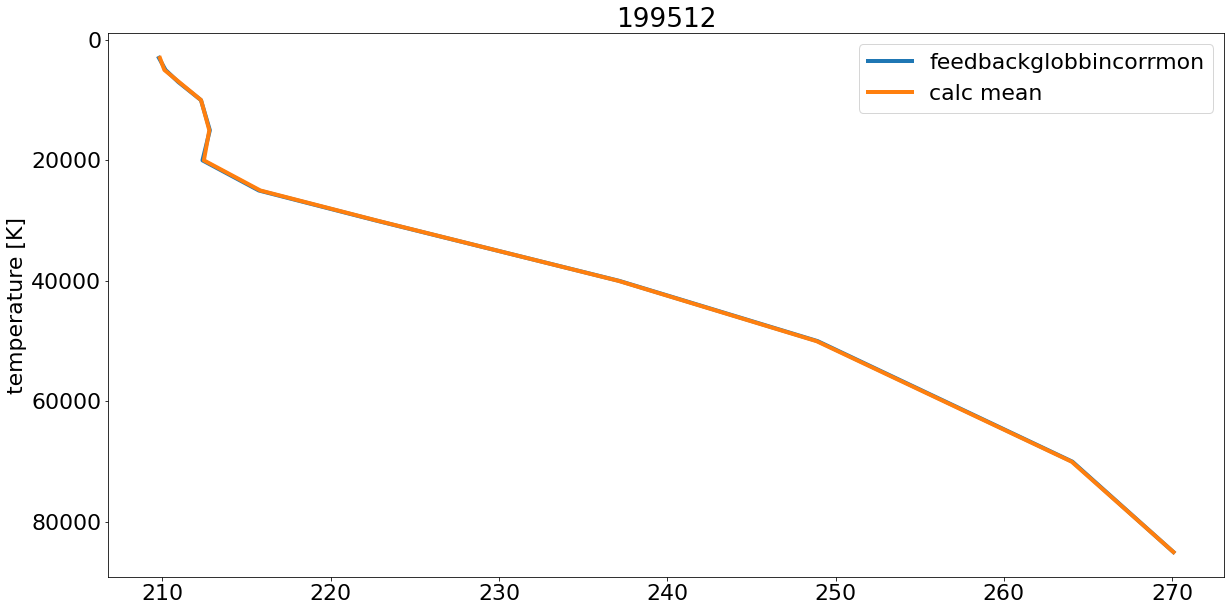

199601



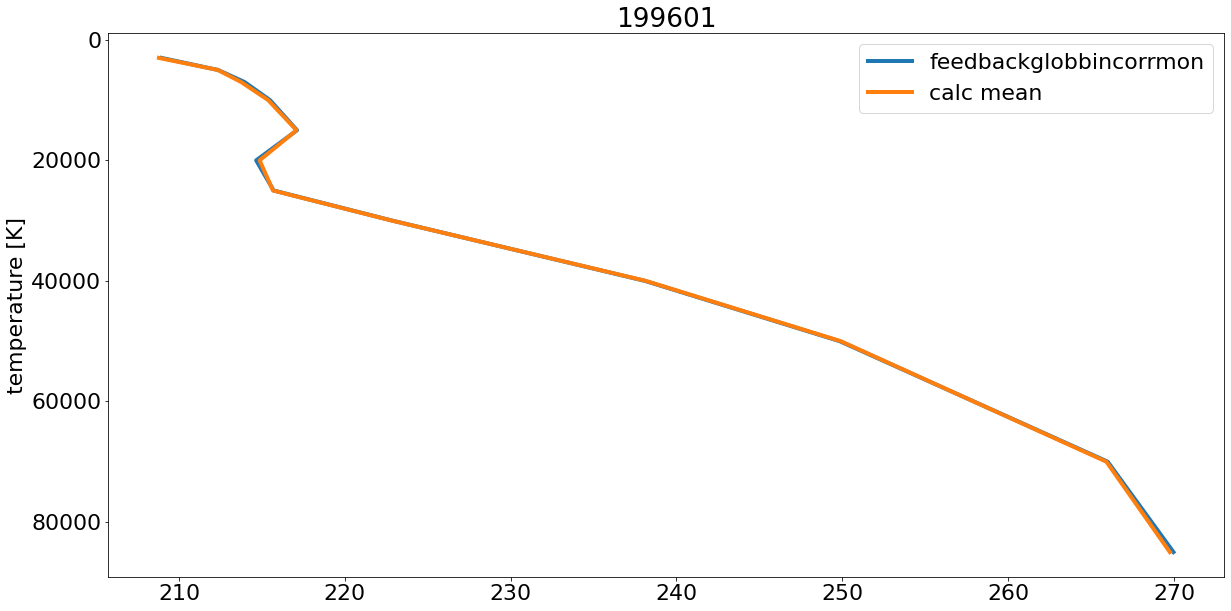

199602



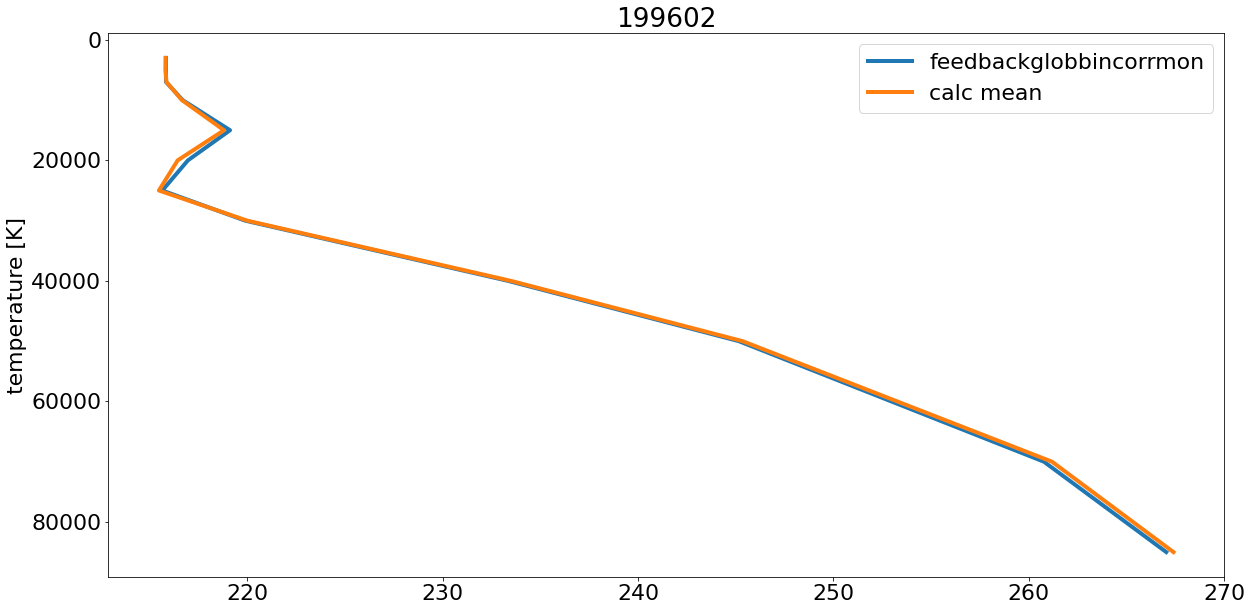

199603



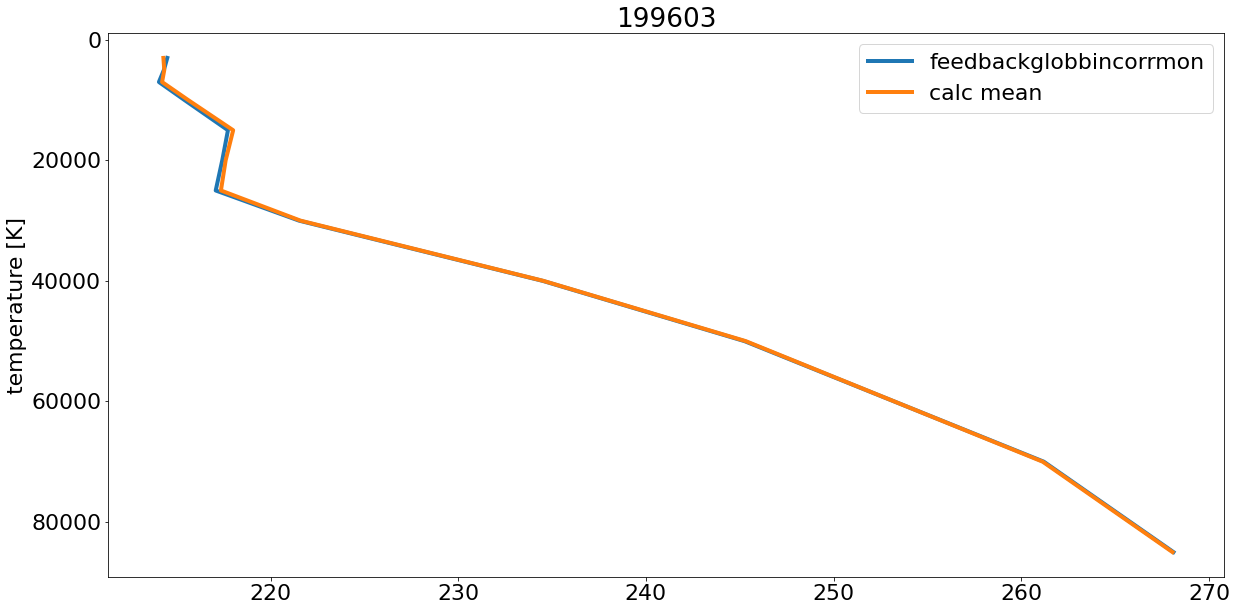

199604



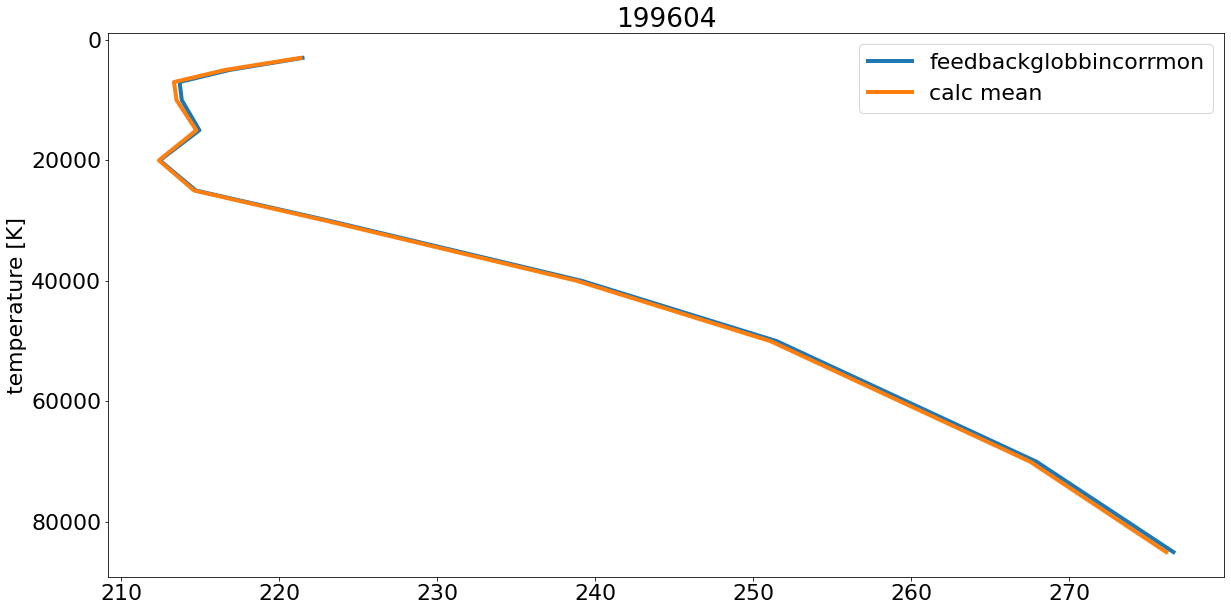

199605



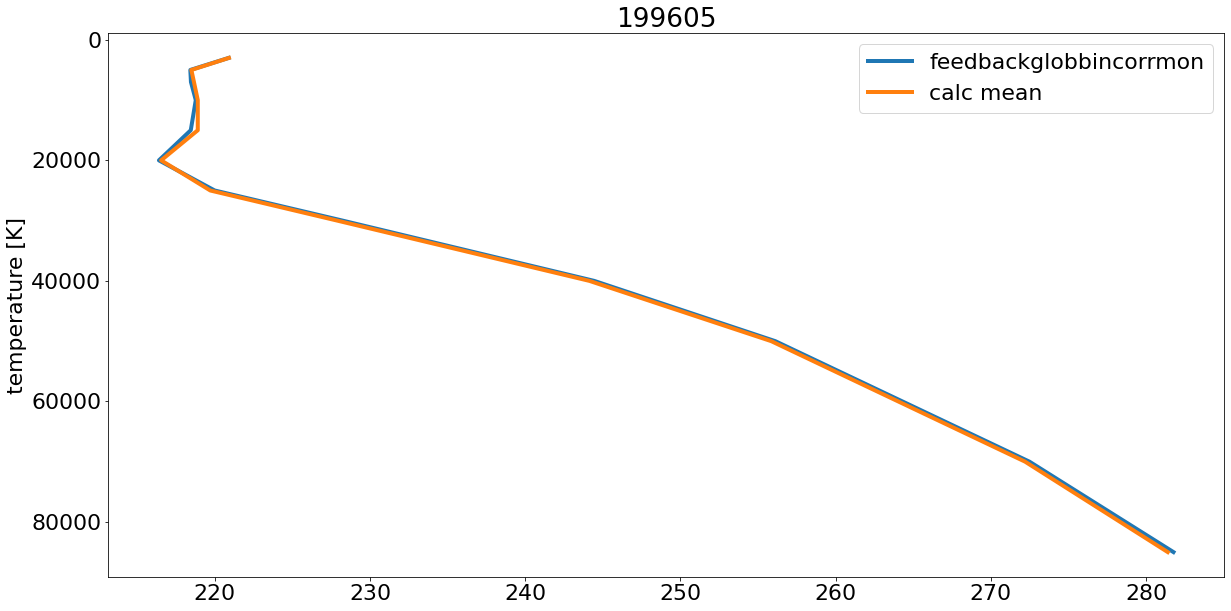

199606



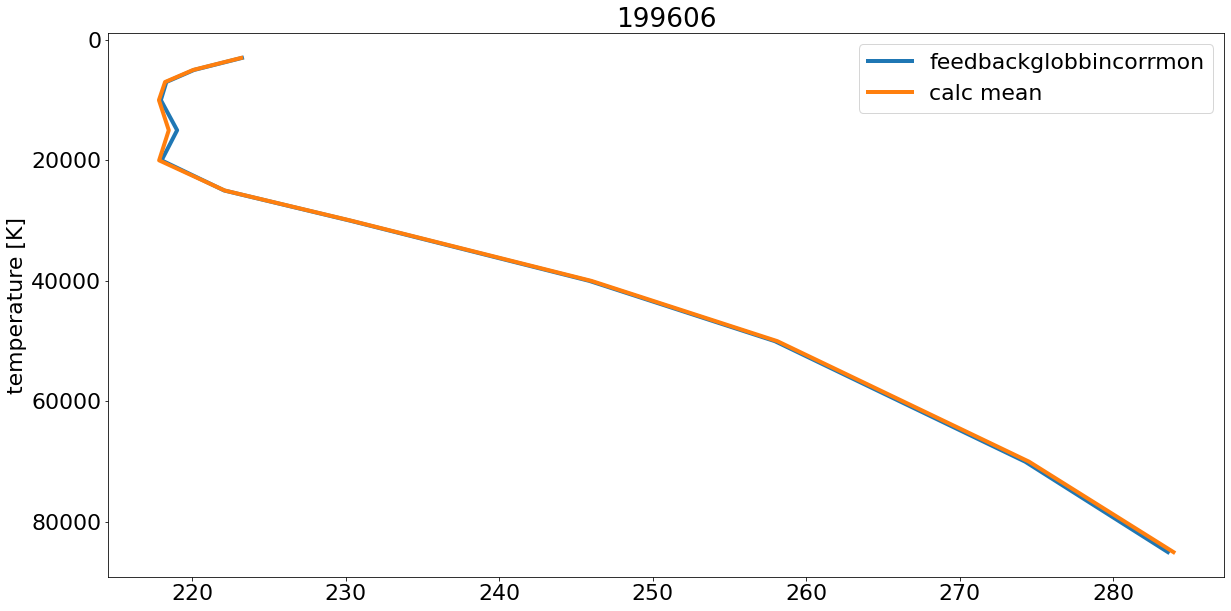

199607



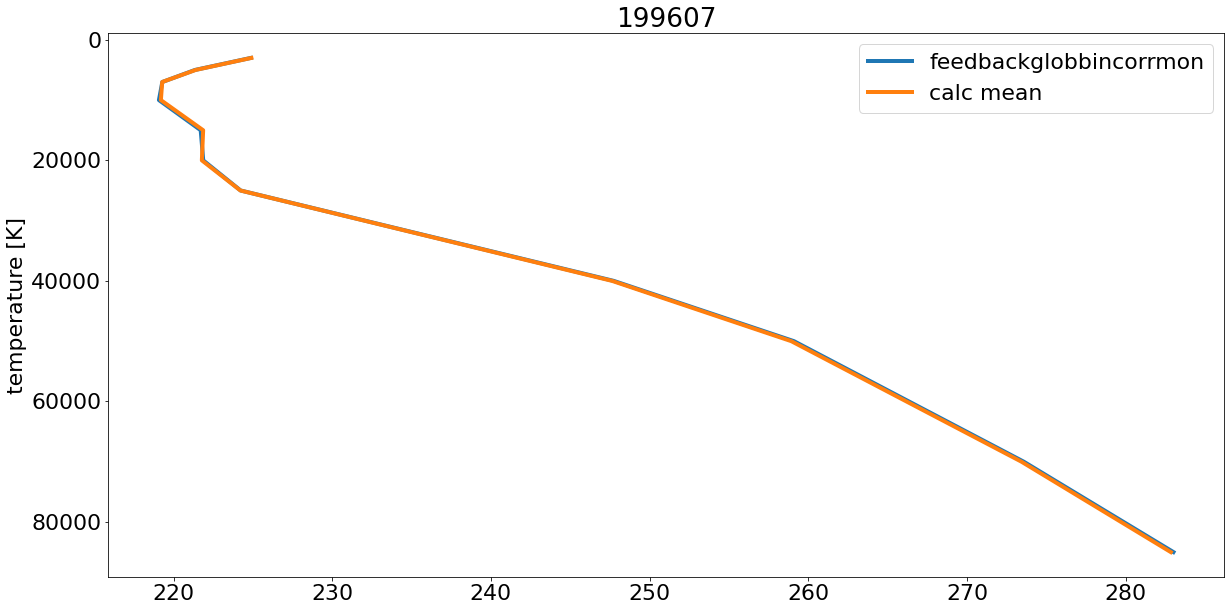

199608



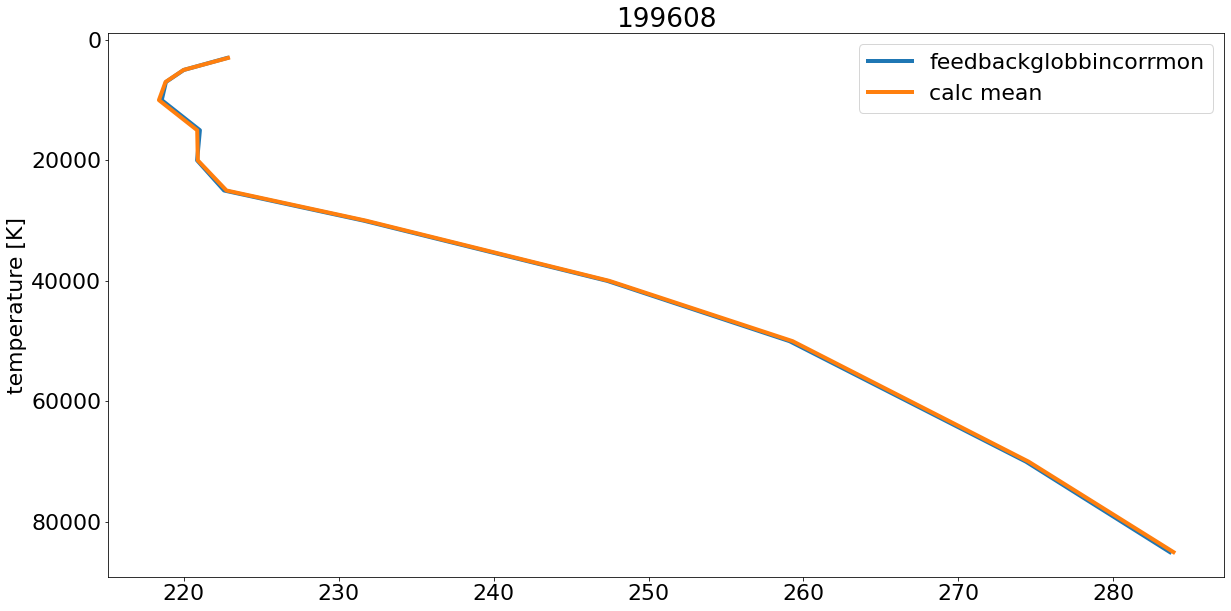

199609



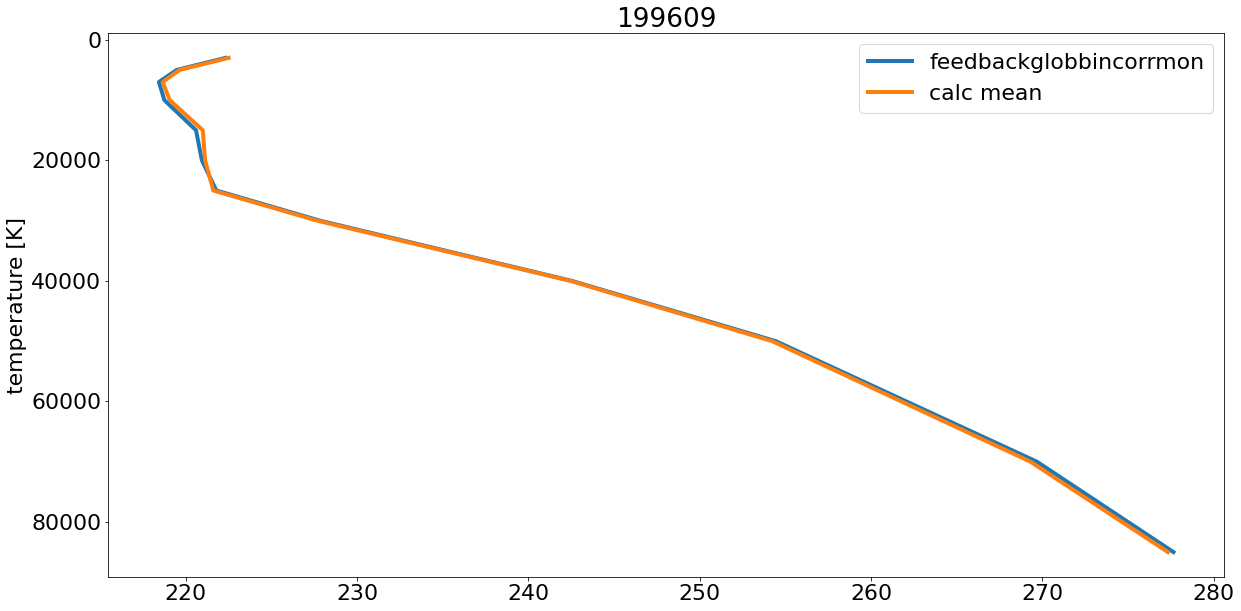

199610



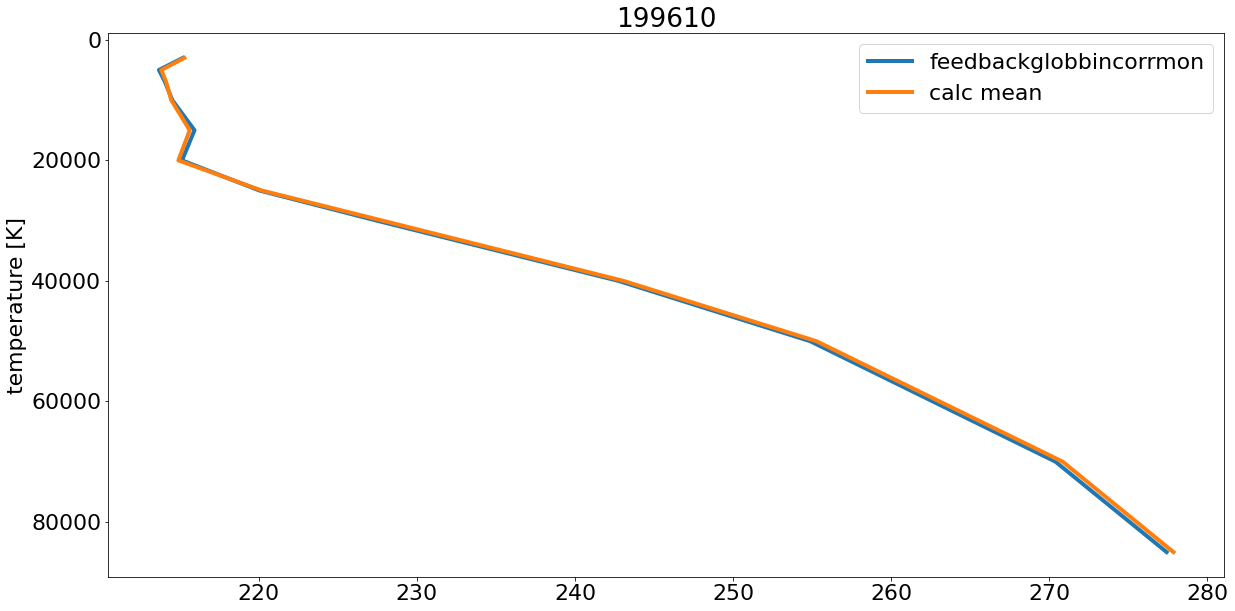

199611



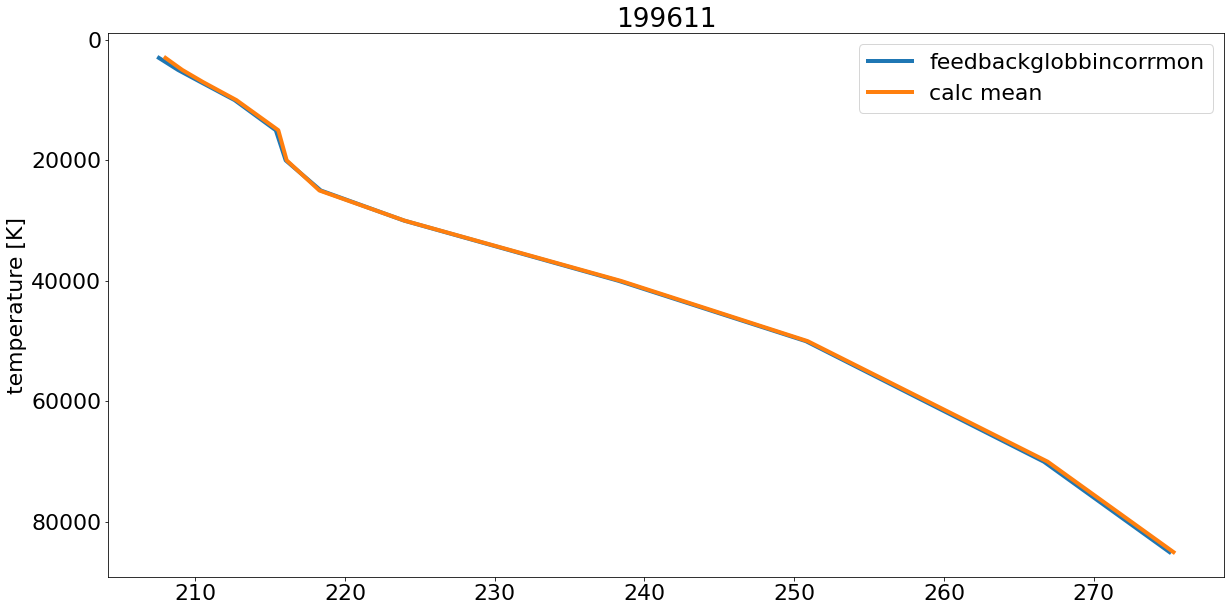

199612



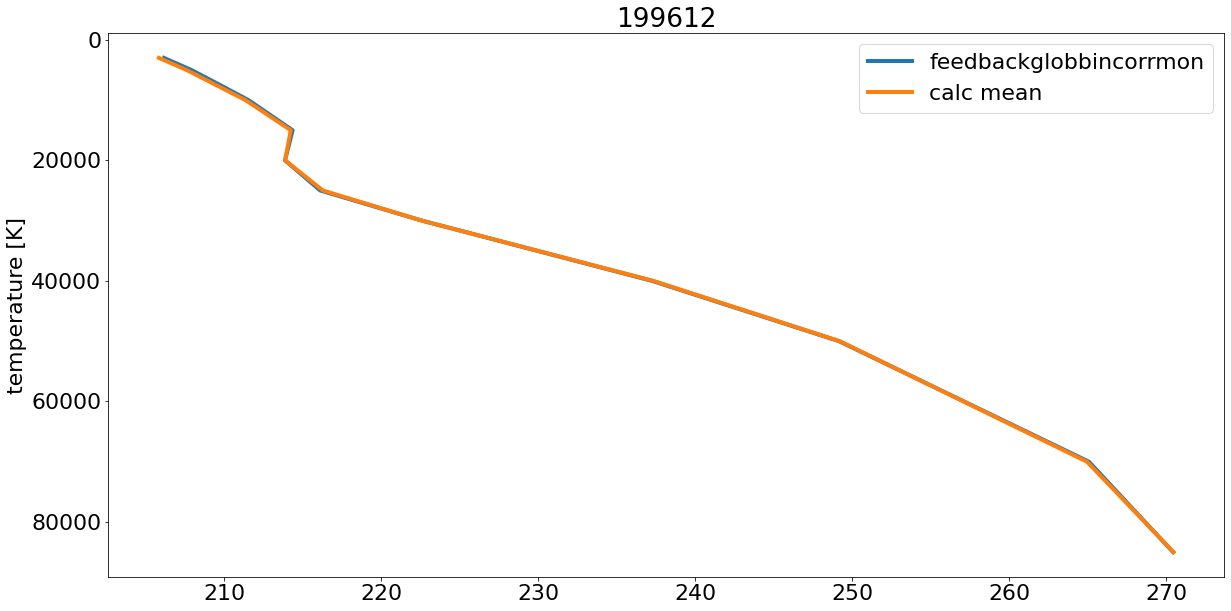

199501



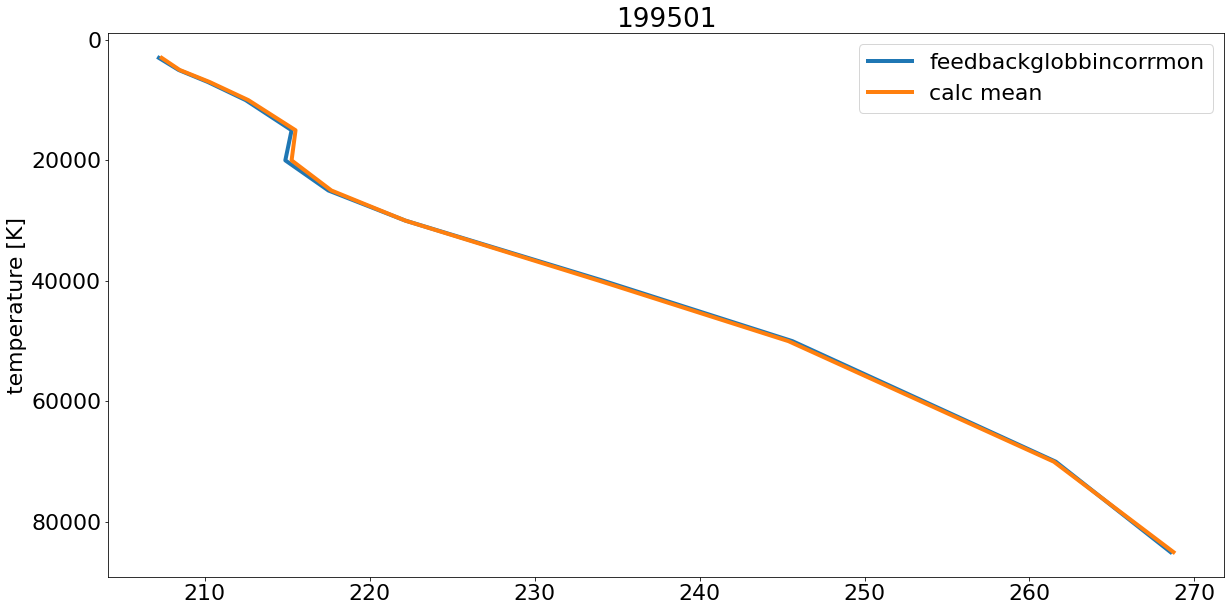

199502



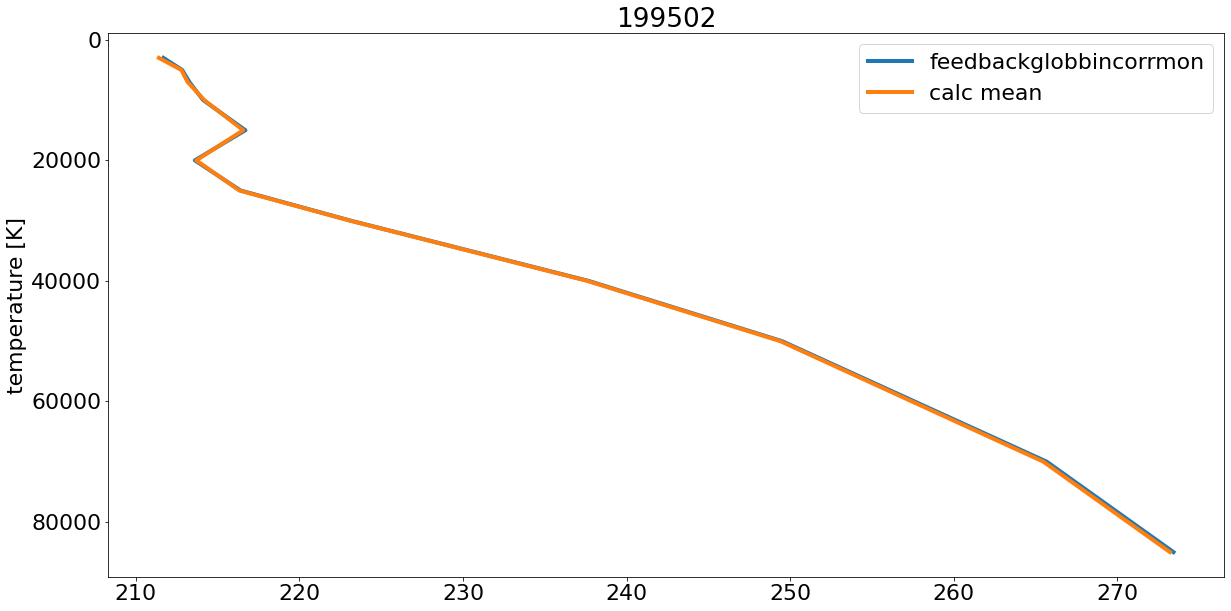

199503



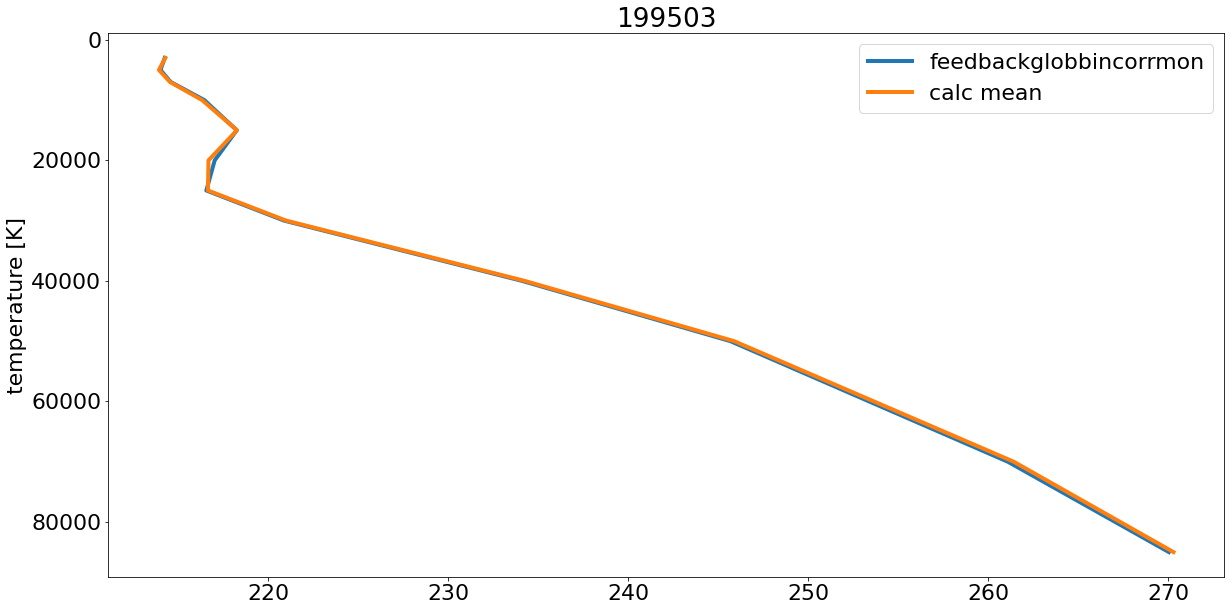

199504



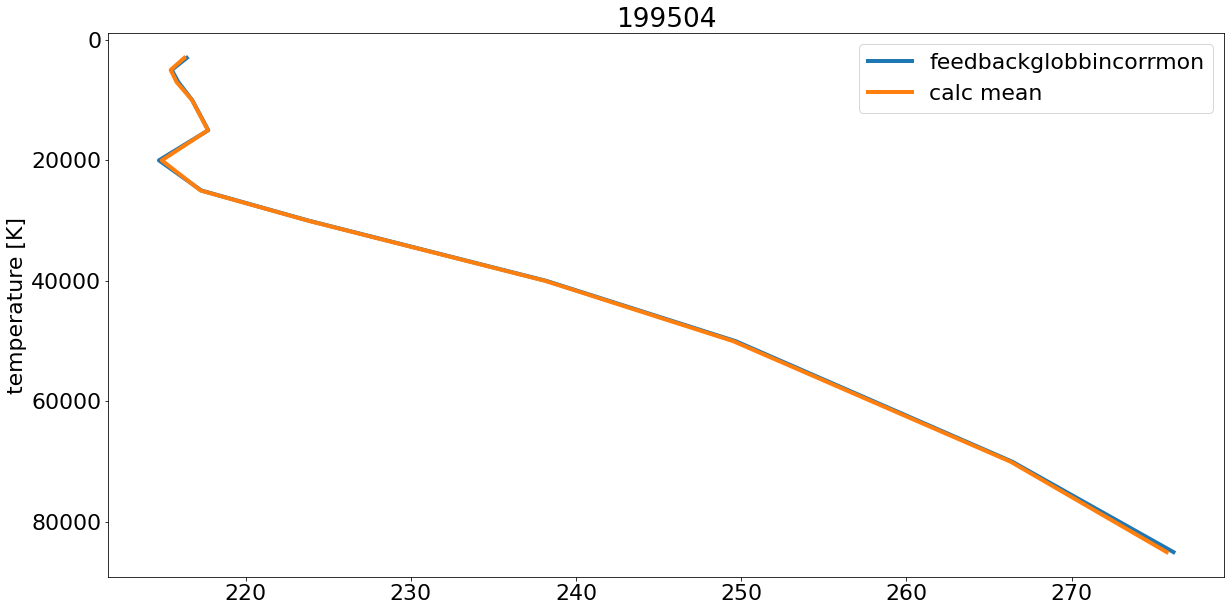

199505



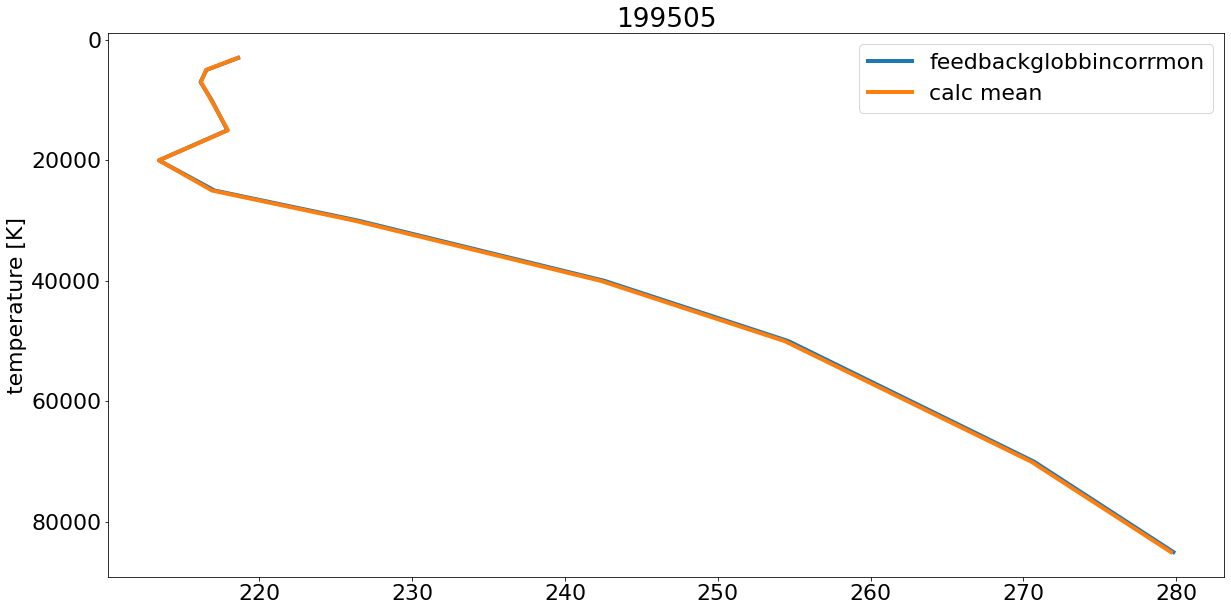

199506



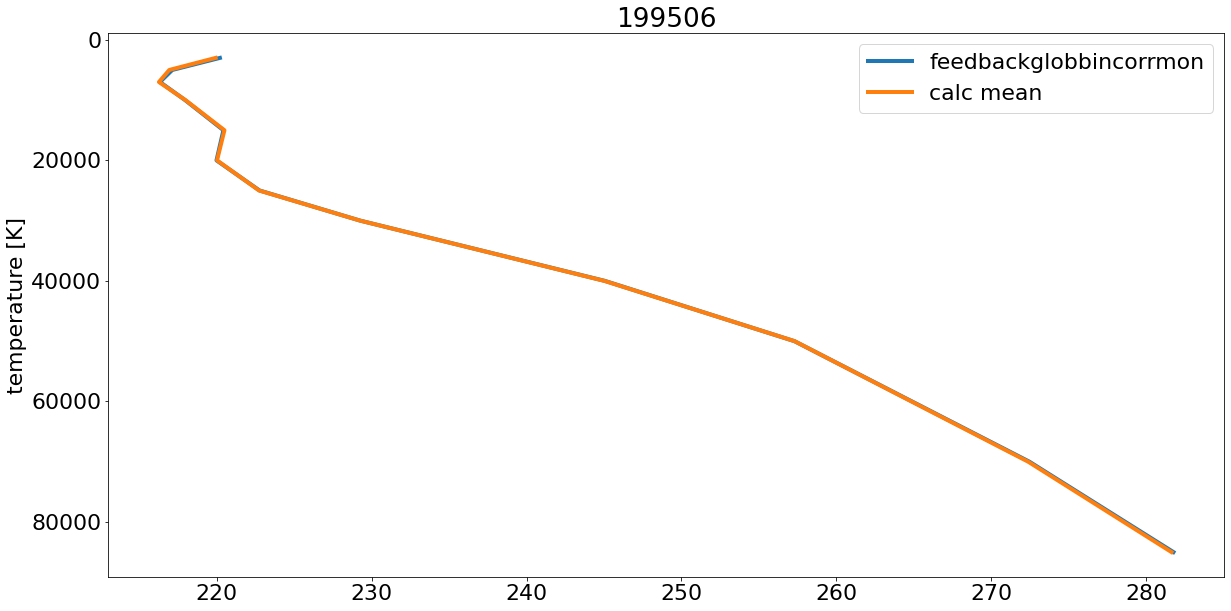

199507



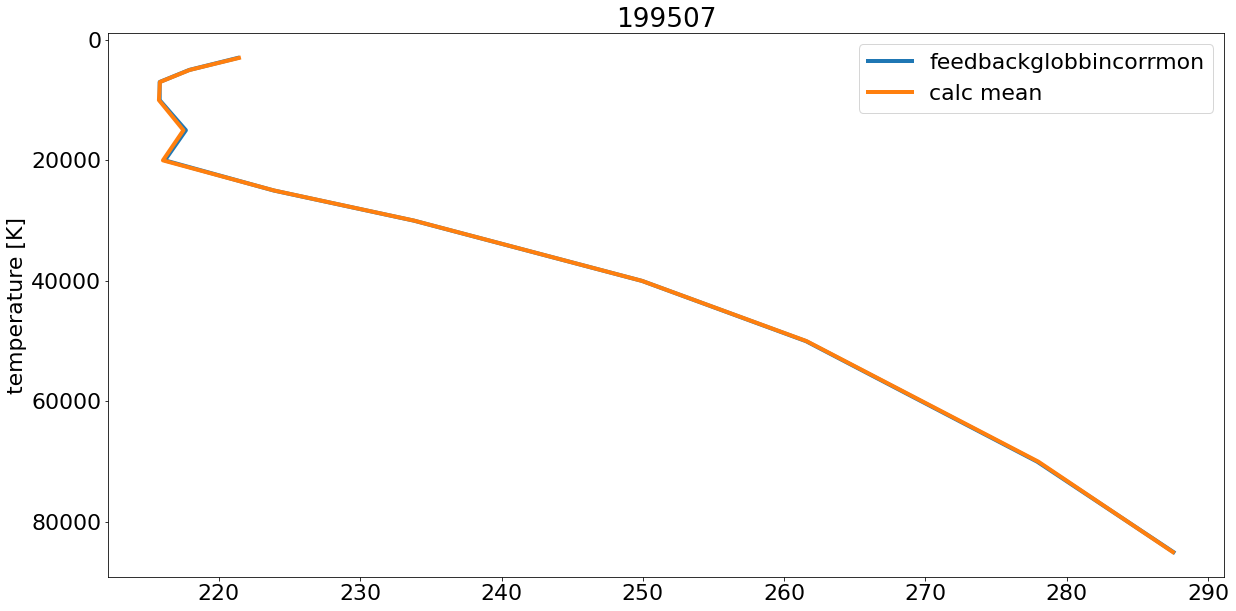

199508



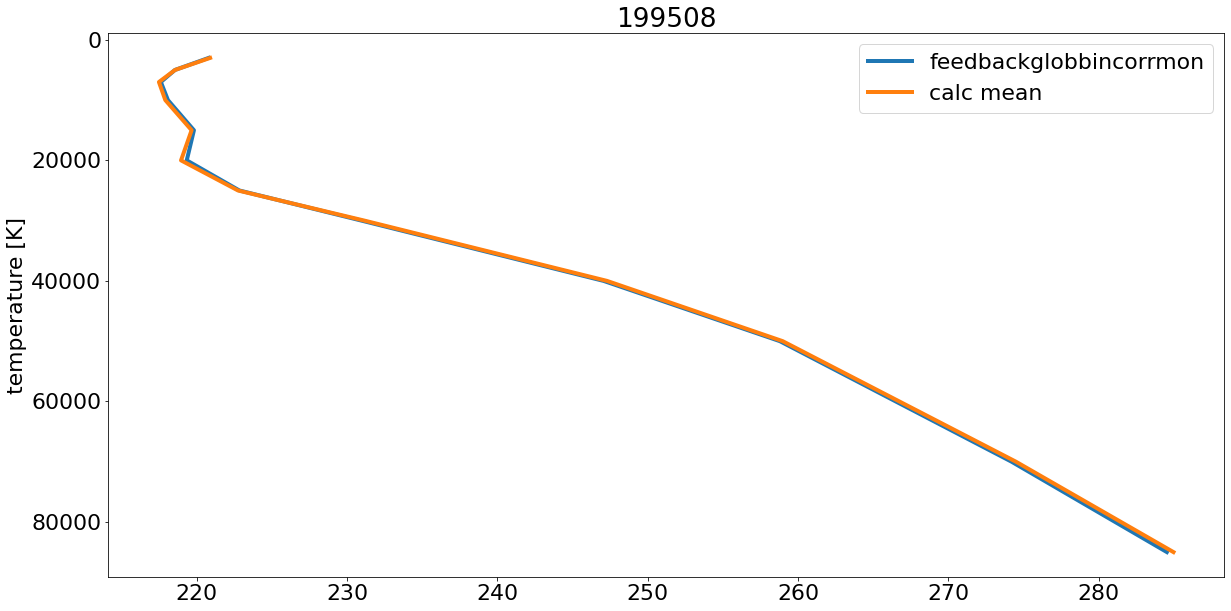

199509



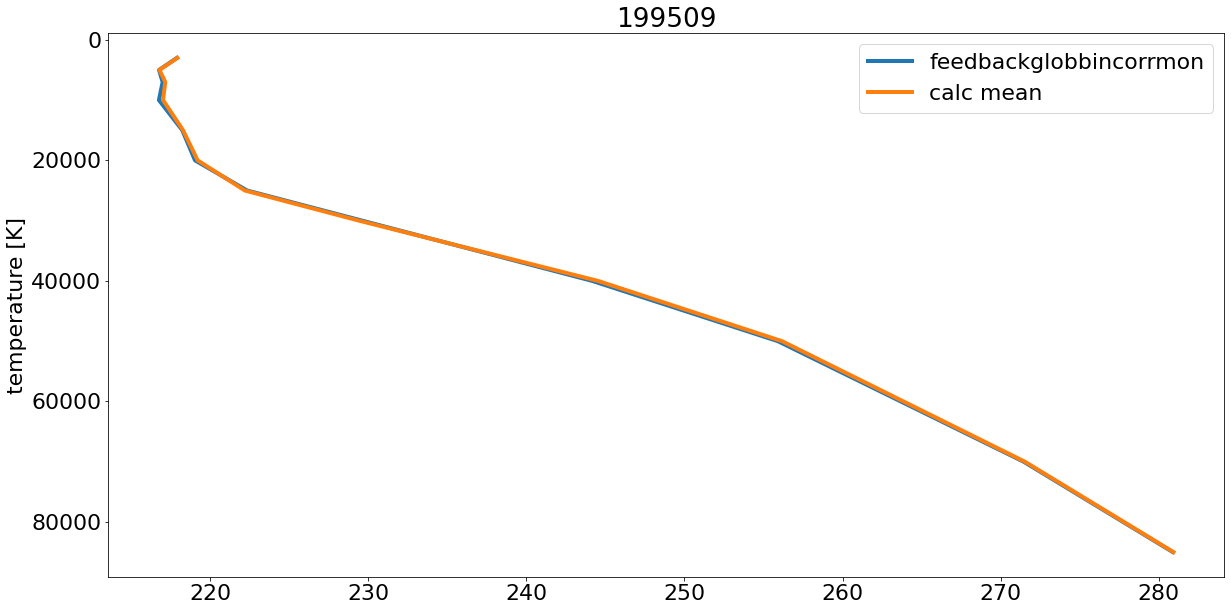

199510



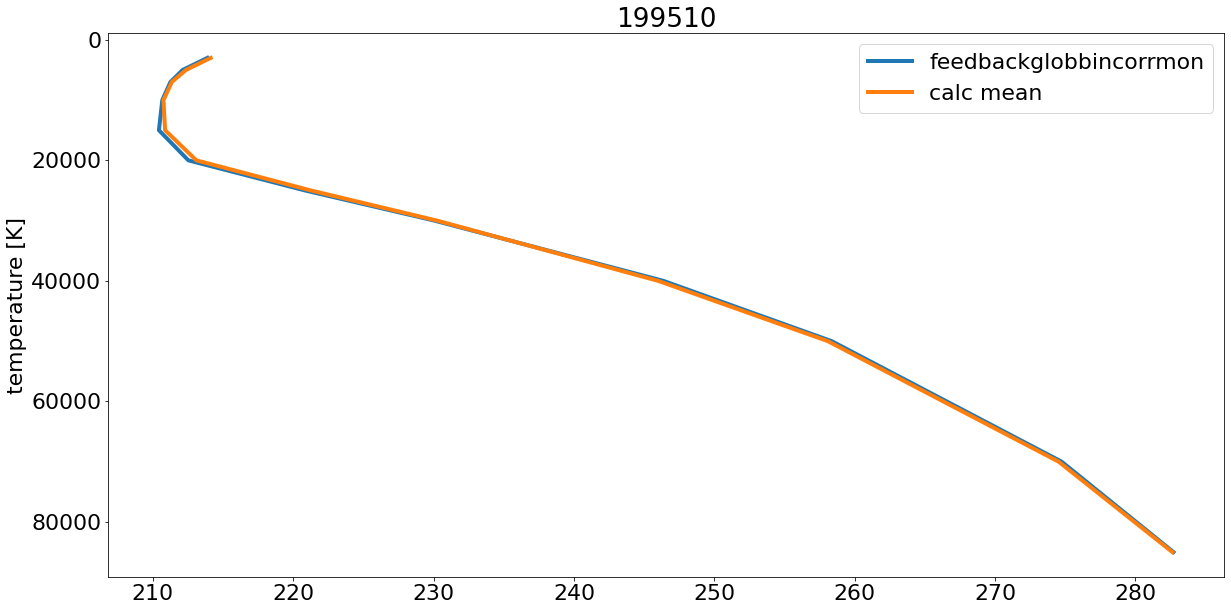

199511



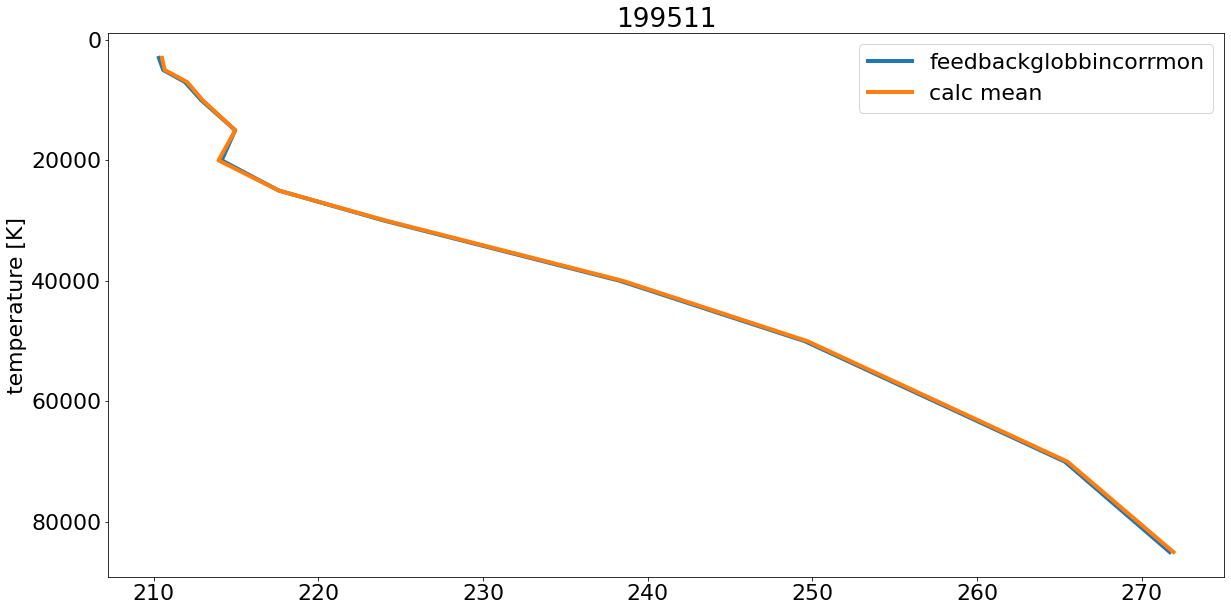

199512



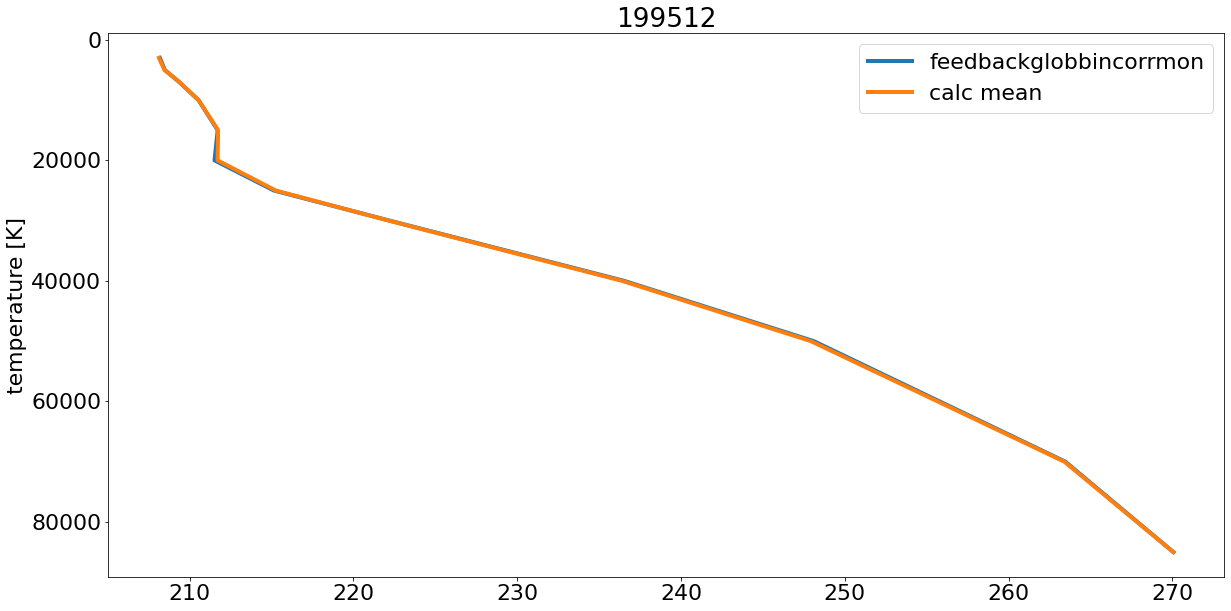

199601



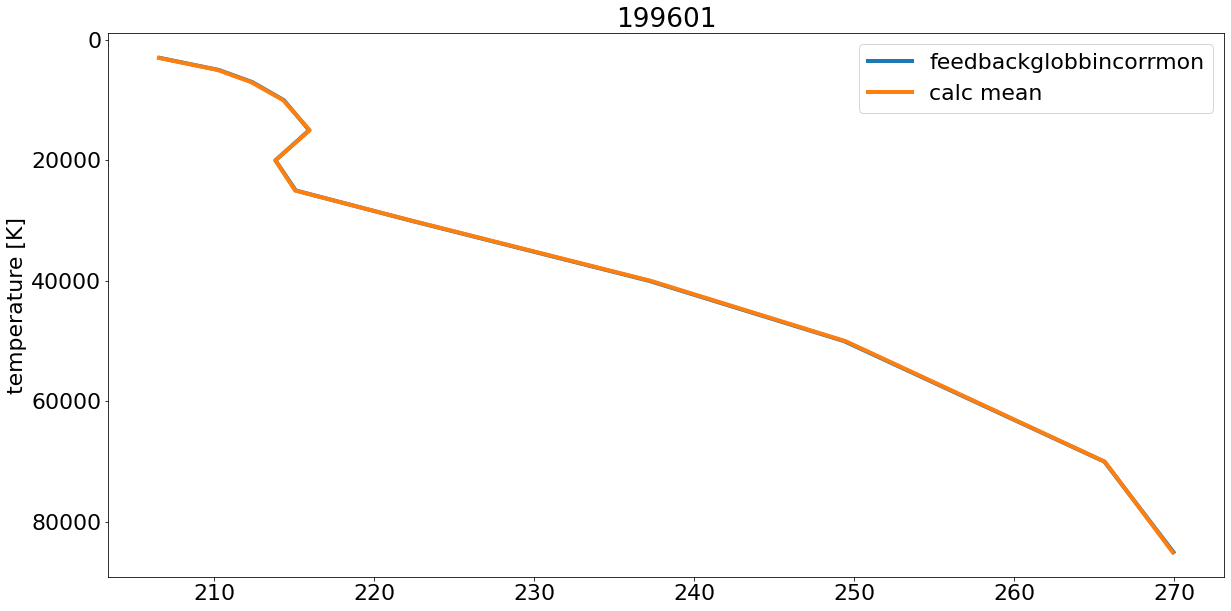

199602



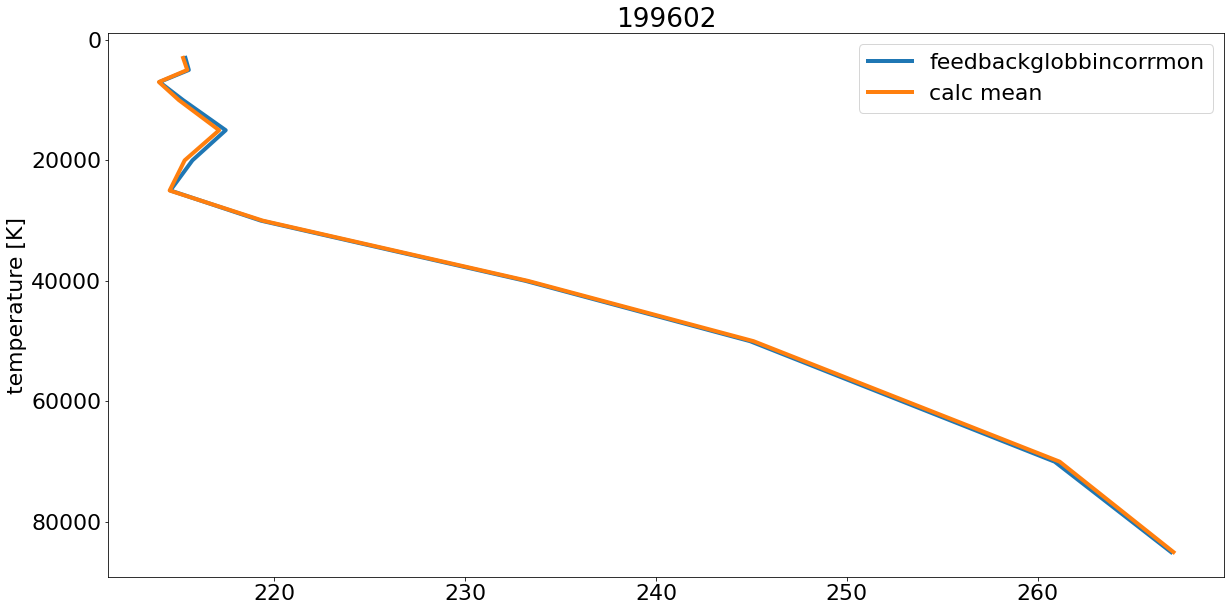

199603



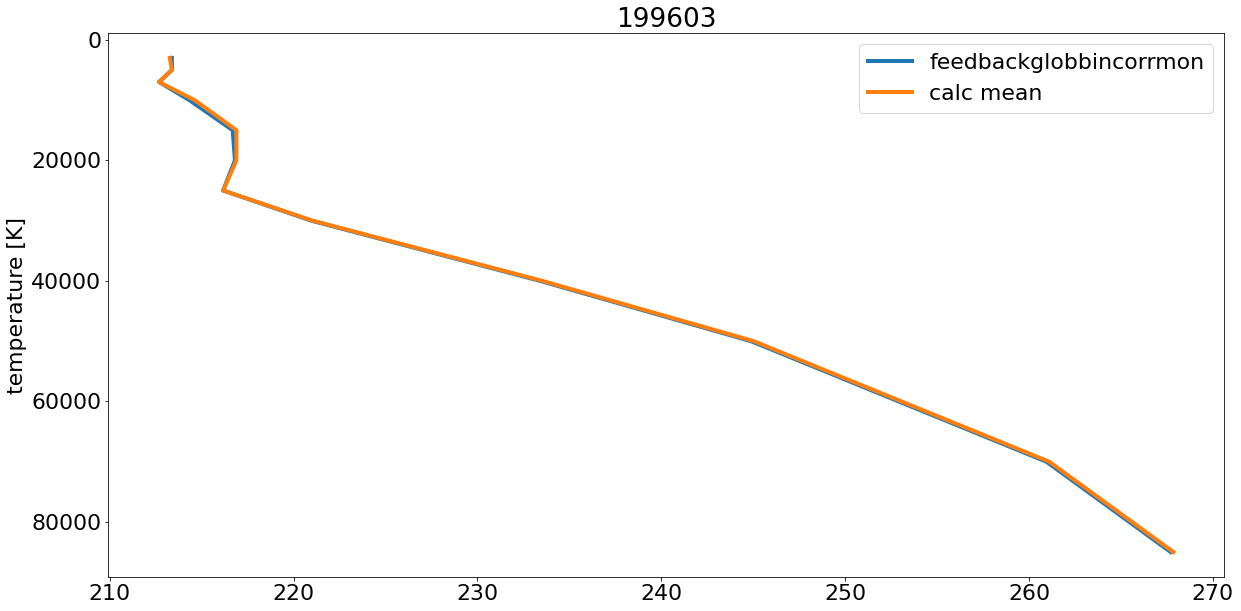

199604



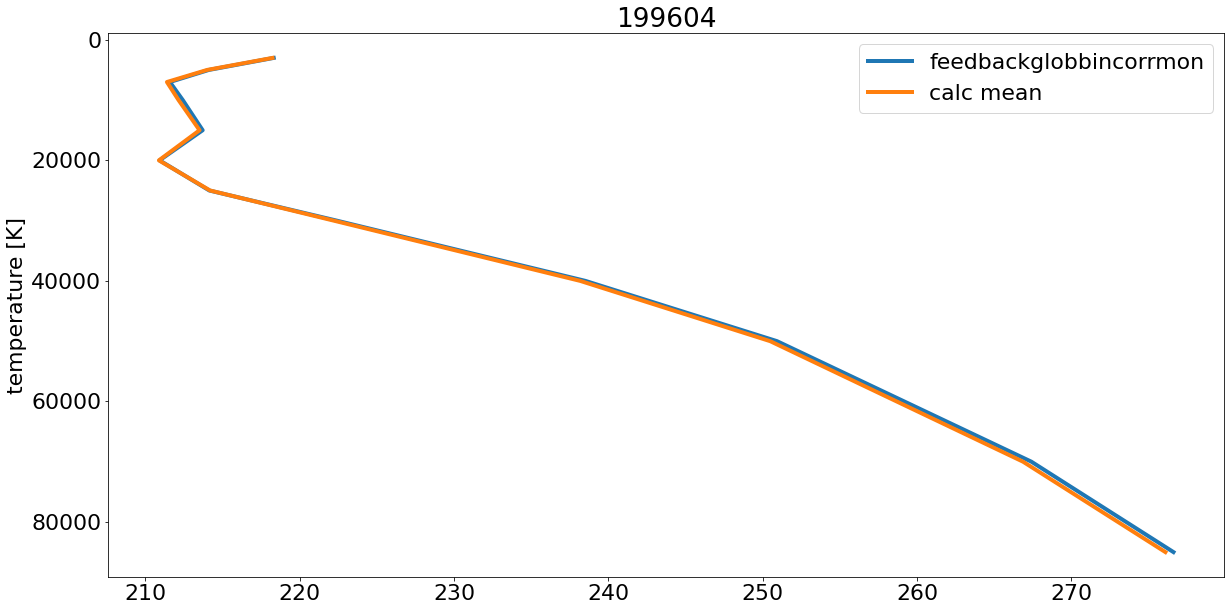

199605



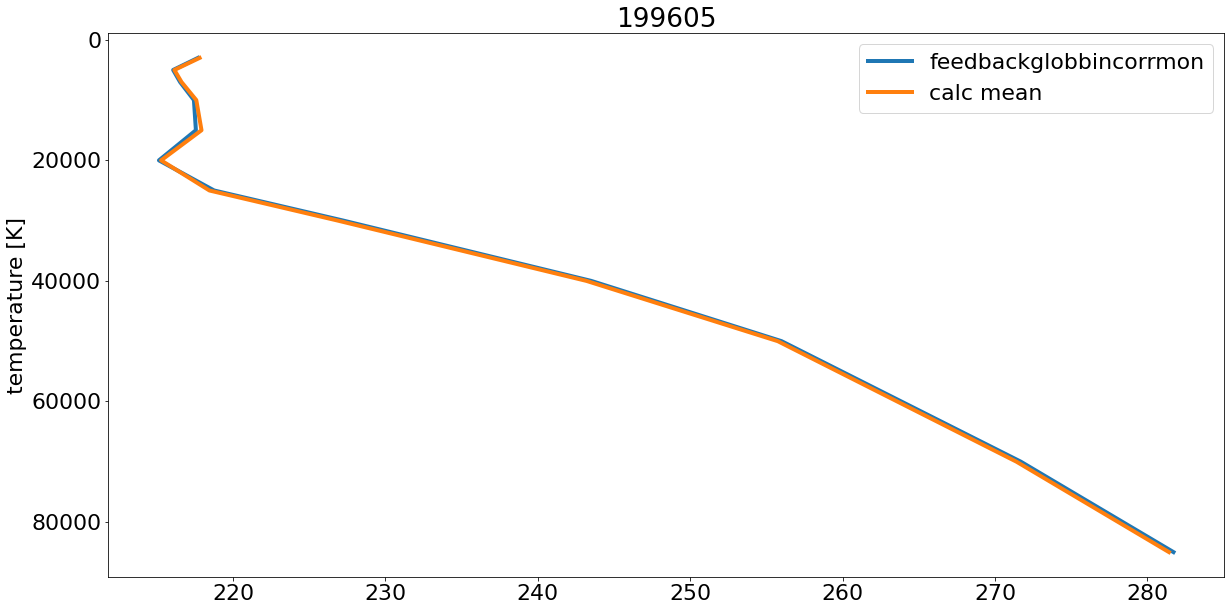

199606



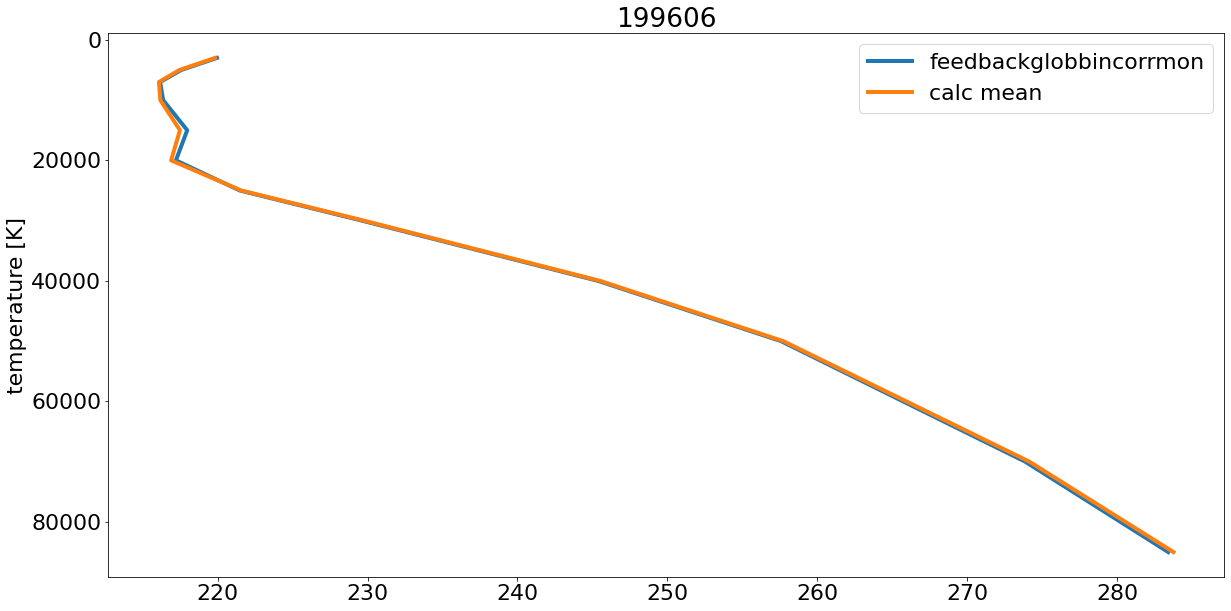

199607



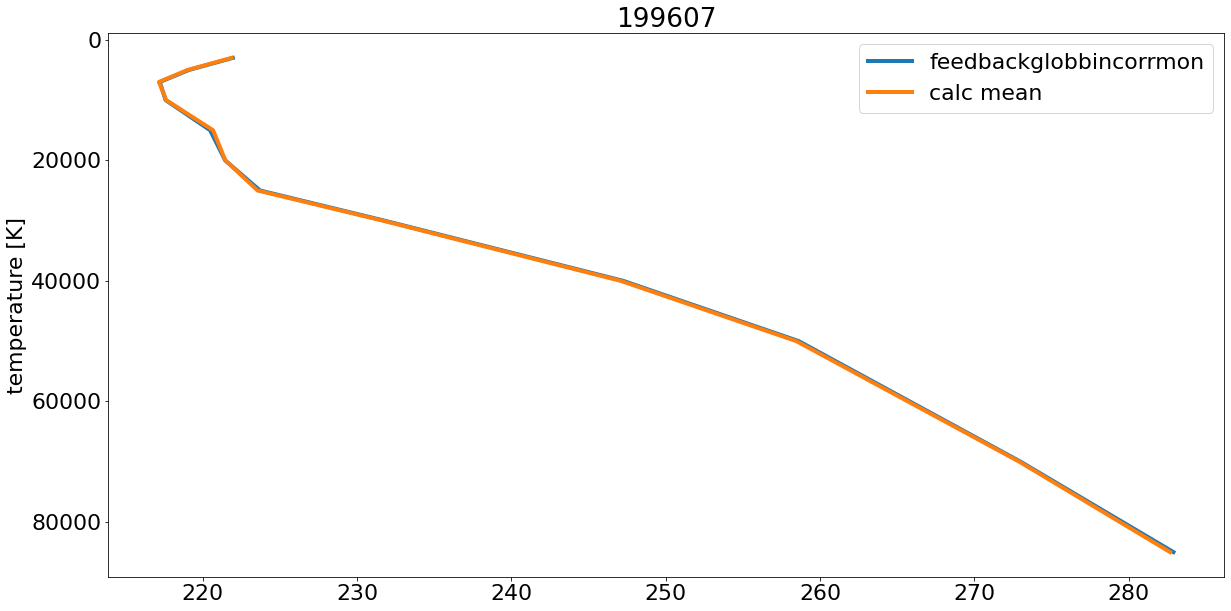

199608



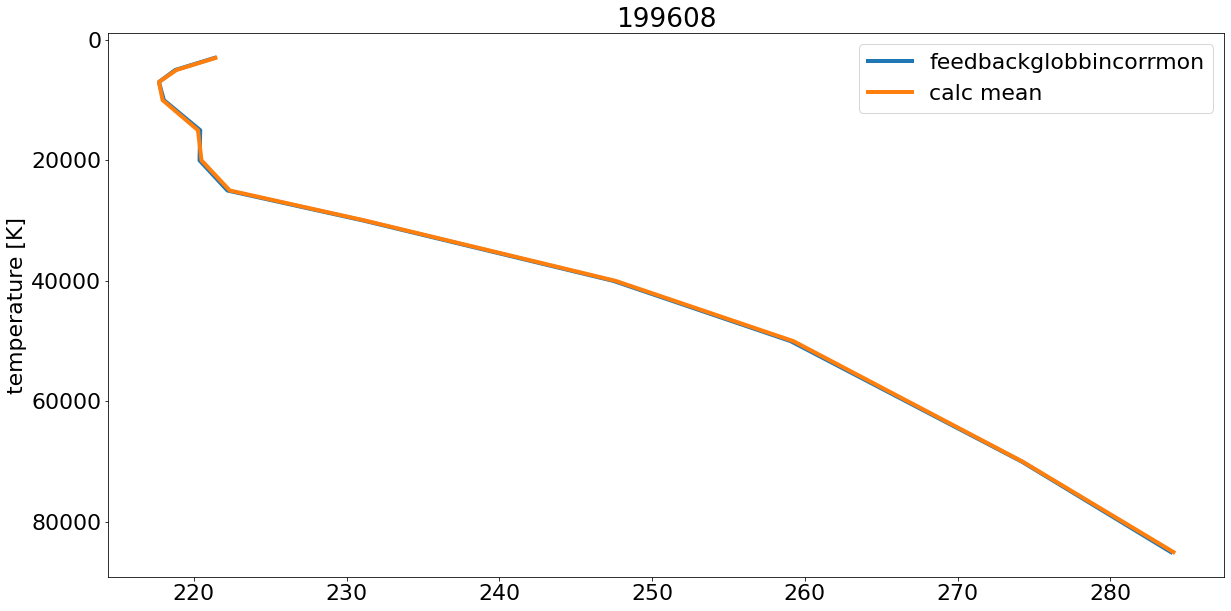

199609



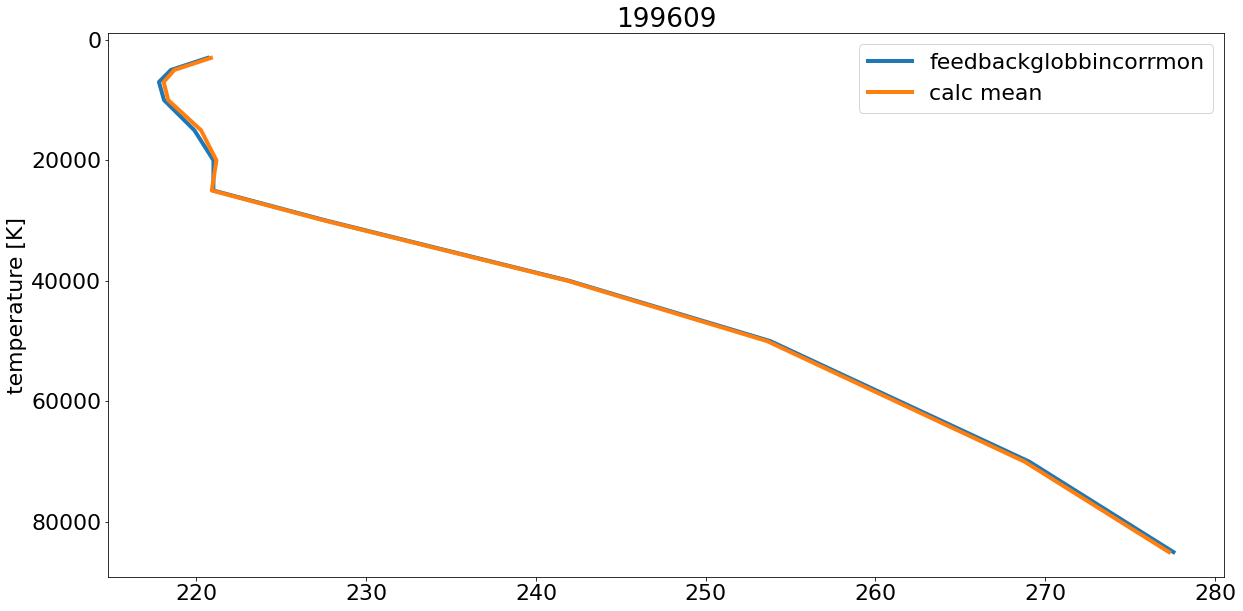

199610



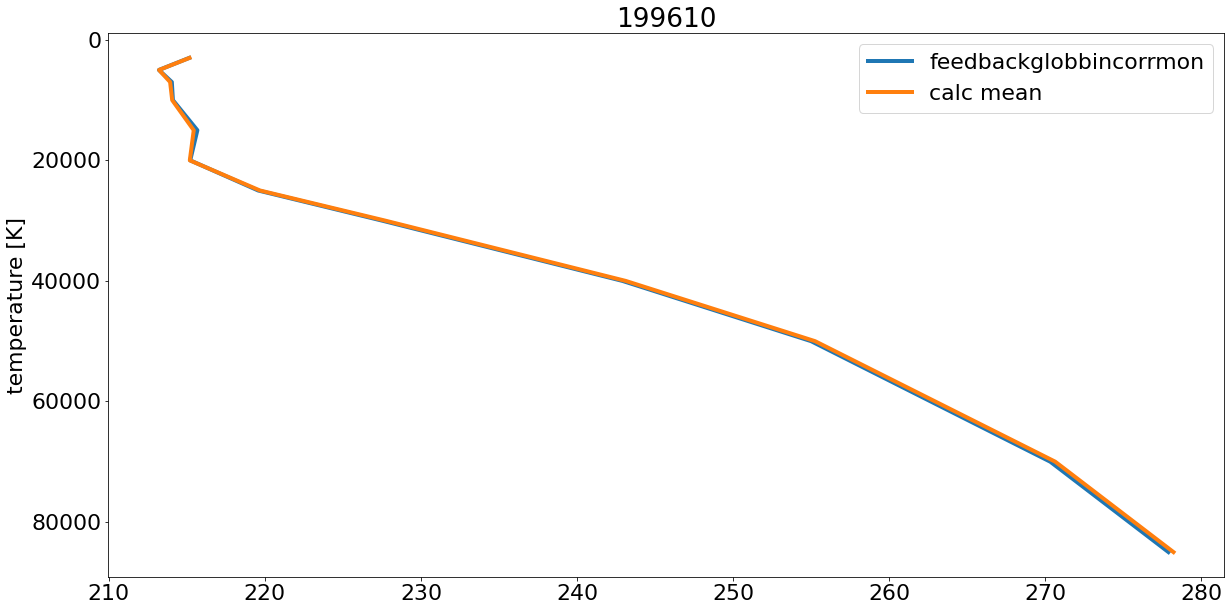

199611



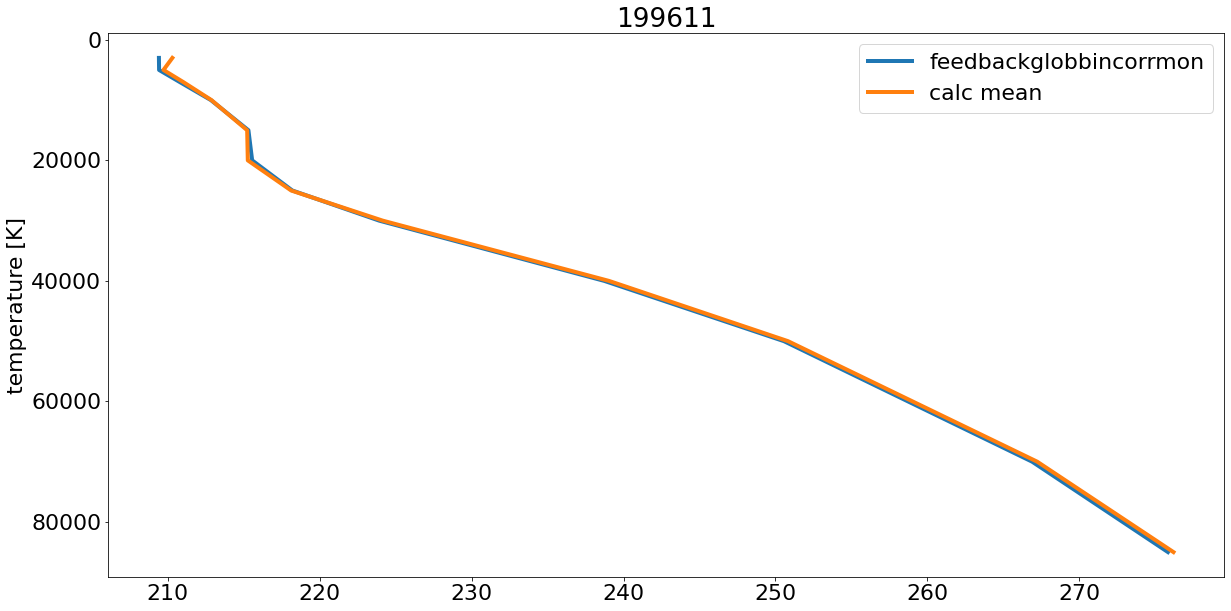

199612



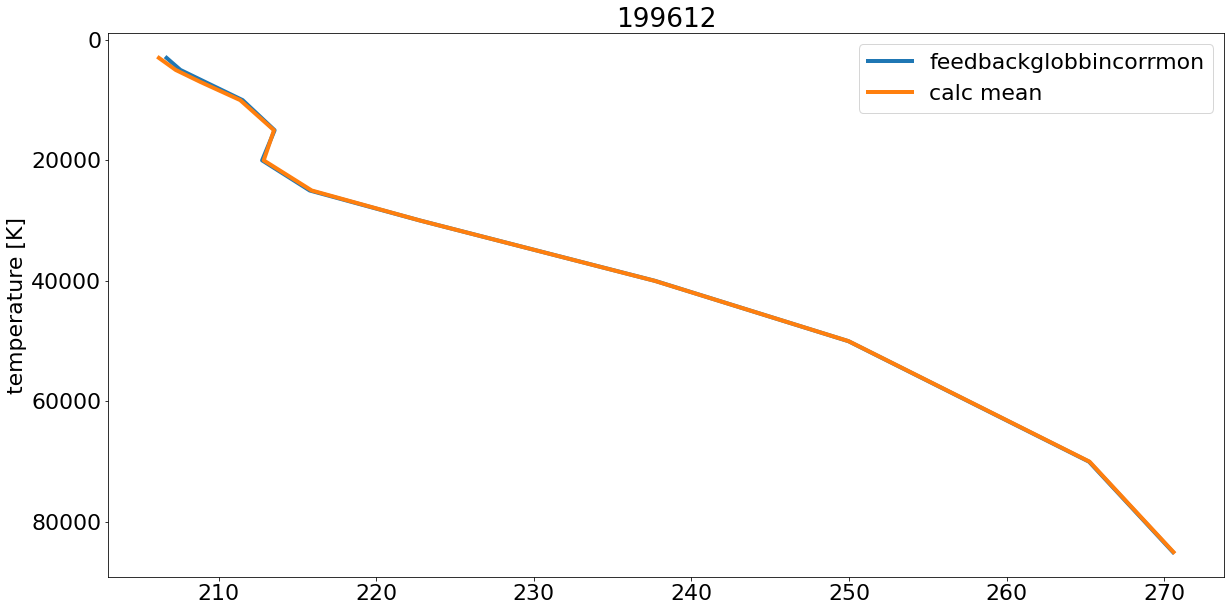

In [13]:

statlist = glob.glob('/mnt/ssdraid/scratch/leo/rise/1.0/exp02/*11035*/feedbackmerged*.nc')[0]
calc_station(statlist)
